# 1. Data Load

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
data = pd.read_csv('Customer.csv')
data.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

## Columns
- 2 개의 숫자 열 :
1. MonthlyCharges : 매월 고객에게 청구되는 금액
2. TotalCharges : 고객에게 청구되는 총 금액

- 19 개의 범주 열 :
1. CustomerID : 각 고객의 고유 한 고객 ID
2. gender : 성별(Female, Male)
3. SenierCitizen : 고객이 노인인지 여부 (1:노인, 0:아님)
4. Partner : 파트너 여부 (Yes, No)
5. Dependents :부양 여부 (Yes, No)
6. tenure : 고객이 회사에 머무른 개월
7. PhoneService : 전화 서비스 여부 (Yes, No)
8. MultipleLines : 고객의 다중 회선 유무 (Yes, No, No phone service)
9. InternetService : 고객의 인터넷 서비스 제공 업체 (DSL, Fiber optic, No)
10. OnlineSecurity :온라인 보안 여부(Yes, No, No internet service)
11. OnlineBackup : 온라인 백업 여부 (Yes, No, No internet service)
12. DeviceProtection 고객이 기기 보호 기능을 제공여부 (Yes, No, No internet service)
13. TechSupport : 기술 지원을 받았는지 (Yes, No, No internet service)
14. StreamingTV :스트리밍 TV여부 (Yes, No, No internet service)
15. StreamingMovies : 스트리밍 영화 여부 (Yes , No, No internet service)
16. contact : 계약 기간 (Month-to-month, One year,Two year)
17. PaperlessBilling :종이 명세서 여부(Yes, No)
18. PaymentMethod : 결제 수단 (Electronic check, Mailed check, Bank transfer (automatic),Credit card (automatic))
19. Churn : 이탈여부 (Yes, No)           

# 2. Null값 처리 및 데이터 전처리


In [ ]:
print(data.info(), data.shape,'\n')
print(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data = data.drop('customerID', axis=1)
# to_numeric : 똑같은 형식의 숫자로 정렬, errors 옵션 : 숫자 이외의 값을 어떻게 처리할지 설정
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data[np.isnan(data['TotalCharges'])]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [ ]:
# SeniorCitizen : Yes, No

data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No',1:'Yes'})
data.head(3)

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No  
2              Yes      Mailed check           53.85        108.15   Yes

In [ ]:
payment = {'Electronic check' : 'Electronic', 'Mailed check' : 'Mail', 
           'Bank transfer (automatic)' : 'Bank_tf','Credit card (automatic)':'card'}
data['PaymentMethod'].replace(payment, inplace=True)

# EDA

## Outlier

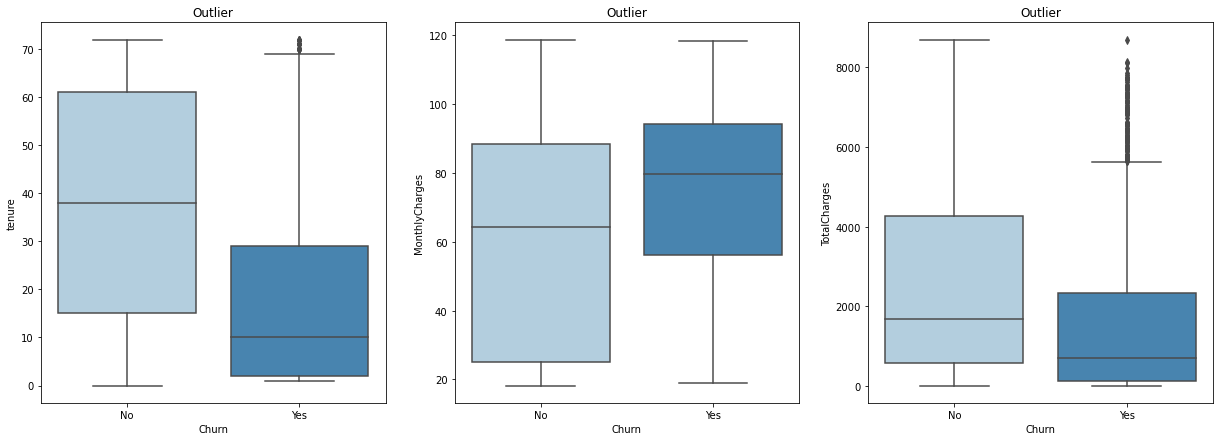

In [ ]:
import matplotlib.pyplot as plt

plots = {1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,236]}

def boxplot(x,y,df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=data[[x,j]], palette='Blues')
        ax.set_title('Outlier')
        
    return plt.show()
boxplot('Churn',['tenure','MonthlyCharges','TotalCharges'],data)

- tenure - churn : 이탈고객은 이탈하지 않은 고객의 중앙값과 비교하면 10개월과 38개월 사이에 많이 분포되어 있다
- MonthlyCharges - Churn : 이탈자의 대부분은 60달러에서 80달러 사이의 월 요금을 납부하며 이용했다
- TotalCharges - Churn : 월요금의 결과라서 데이터가 불균형하며 월 요금이 더 신뢰가 있어 보인다

In [ ]:
# TotalCharges 컬럼 null값 MonthlyCharges값대체
data.TotalCharges.fillna(data.MonthlyCharges, inplace=True)
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## [Gender - Churn]

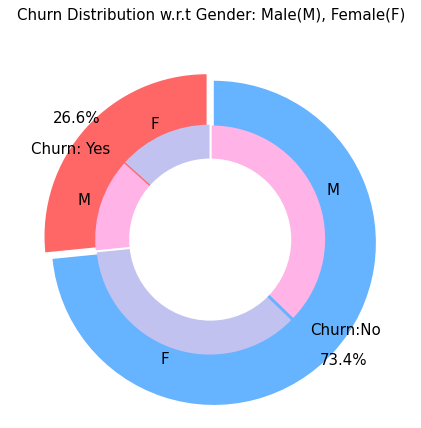

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
data['Churn'][data['Churn']=='Yes'].groupby(by=data['gender']).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

- **26.6%의 고객이 다른 통신사로 이탈했고, 이탈비율은 남성(Male) : 50.5%, 여성(Female) : 49.5% 입니다**

- 고객이탈에 있어 성별은 고르게 분포되었고 크게 작용하지 않다는 점을 볼 수 있습니다

## [Contract - Churn]

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**단기계약자(월단위)들의 이탈이 장기계약자(년단위)들 보다 월등히 이탈을 많이 한다고 나타납니다**

## [PaymentMethod -  Churn]

In [ ]:
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**대다수의 고객은 Electronic Check(전자결제) 방식을 사용했고, mail,bank_transfer, card 방식 사용 고객의 이탈률이 적다**

## [MultiplyLines,MonthlyCharges - Churn]

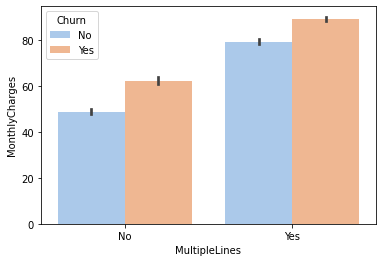

In [ ]:
data['MultipleLines'].replace('No phone service','No', inplace=True)
sns.barplot(x='MultipleLines', y = 'MonthlyCharges', hue='Churn',palette = 'pastel', data=data)
plt.show()

- MultipleLine을 이용하는 고객(월 요금을 많이 내는고객)이 이탈을 더 많이 했지만, 많은 차이가 나진 않는다

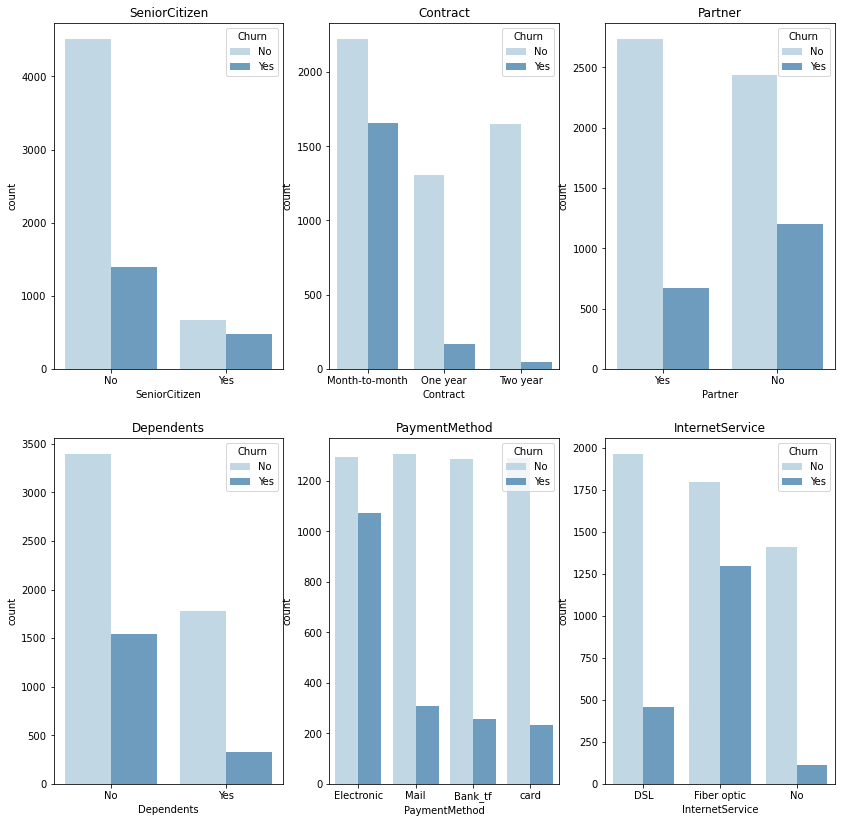

In [ ]:

def countplot(x,y,df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[0])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i , j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data= data, palette = 'Blues', alpha = 0.8, linewidth=0.4,)
        ax.set_title(j)
    
    return plt.show()
countplot('Churn',['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'],data)

 - 고령자 이탈률은 비고령자 이탈률보다 훨씬 높다
 - 단기(월단위) 계약 해지율은 장기(년단위) 계약 해지률보다 훨씬 높다
 - 파트너가 없는 고객이 파트너가 있는 고객보다 이탈률이 높다
 - 자녀가 없는 고객이 자녀가 있는고객보다 이탈률이 높다
 - 결제 수단이 Electronic 인 고객이 다른 결제 수단보다 이탈률이 월등히 높다
 - InternetService를 Fiber optic으로 사용하는 고객의 이탈률이 월등히 높다

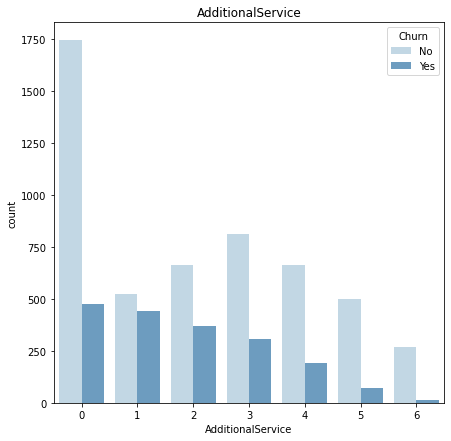

In [ ]:
# 부가서비스 사용자만 AdditionalService 컬럼 생성
data['AdditionalService'] = (data[['OnlineSecurity','OnlineBackup',
                                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=='Yes').sum(axis=1)
countplot('Churn',['AdditionalService'],data)

- 추가서비스를 통한 인사이트 : 1개의 추가 서비스가 있는 고객의 이탈률이 매우높고
- 추가 서비스가 많아 질수록 고객은 이탈률이 낮아지고 있습니다.

In [ ]:
# Addition 이라는 데이터프레임 생성
Addition_df = data['AdditionalService'].value_counts().reset_index()
# 퍼센테이지 단위변경
Addition_df = Addition_df[Addition_df['AdditionalService'] /  Addition_df['AdditionalService'].sum() > 0.01]

# 파이차트 구현
fig = px.pie(Addition_df, values='AdditionalService', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))

fig.show()

In [ ]:
data['gender'].replace({'Female':1, 'Male':0}, inplace=True)
# Ordinal Encoding
df = {'Month-to-month':3,'One year': 2,'Two year': 1}
data['Contract'] = data.Contract.map(df)


# Label Encoding / Churn : 이탈안함 - 0 , 이탈 - 1
from sklearn.preprocessing import LabelEncoder
def object_to_int(data_ob):
    if data_ob.dtype == 'object':
        data_ob = LabelEncoder().fit_transform(data_ob)
    return data_ob
data = data.apply(lambda x: object_to_int(x))


In [ ]:
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0                 0                0               0             2  ...   
1                 0                0               2             0  ...   
2                 0                0               2             2  ...   
3                 0                0               2             0  ...   
4                 0                1               0             0  ...   
...             ...              ...             ...           ...  ...   
7038              1                0               2             0  ...   
7039              1                1               0             2  ...   
7040              0                0               2             0  ...   
7041              1                1               0             0  ...   
7042              0                1               2             0  ...   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         3                 1   
1               0            0                0         2                 0   
2               0            0                0         3                 1   
3               2            0                0         2                 0   
4               0            0                0         3                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         2                 1   
7039            0            2                2         2                 1   
7040            0            0                0         3                 1   
7041            0            0                0         3                 1   
7042            2            2                2         1                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  AdditionalService  
0                 1           29.85         29.85      0                  1  
1                 2           56.95       1889.50      0                  2  
2                 2           53.85        108.15      1                  2  
3                 0           42.30       1840.75      0                  3  
4                 1           70.70        151.65      1                  0  
...             ...             ...           ...    ...                ...  
7038              2           84.80       1990.50      0                  5  
7039              3          103.20       7362.90      0                  4  
7040              1           29.60        346.45      0                  1  
7041              2           74.40        306.60      1                  0  
7042              0          105.65       6844.50      0                  5  

[7043 rows x 21 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   int64  
 1   SeniorCitizen      7043 non-null   int32  
 2   Partner            7043 non-null   int32  
 3   Dependents         7043 non-null   int32  
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   int32  
 6   MultipleLines      7043 non-null   int32  
 7   InternetService    7043 non-null   int32  
 8   OnlineSecurity     7043 non-null   int32  
 9   OnlineBackup       7043 non-null   int32  
 10  DeviceProtection   7043 non-null   int32  
 11  TechSupport        7043 non-null   int32  
 12  StreamingTV        7043 non-null   int32  
 13  StreamingMovies    7043 non-null   int32  
 14  Contract           7043 non-null   int64  
 15  PaperlessBilling   7043 non-null   int32  
 16  PaymentMethod      7043 

## StandardScaler

In [ ]:
# Standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nor_col = ['tenure','MonthlyCharges','TotalCharges']
data[nor_col] = scaler.fit_transform(data[nor_col])
data.head(1)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           0 -1.277445             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             2  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         3                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  AdditionalService  
0              1       -1.160323     -0.992667      0                  1  

[1 rows x 21 columns]

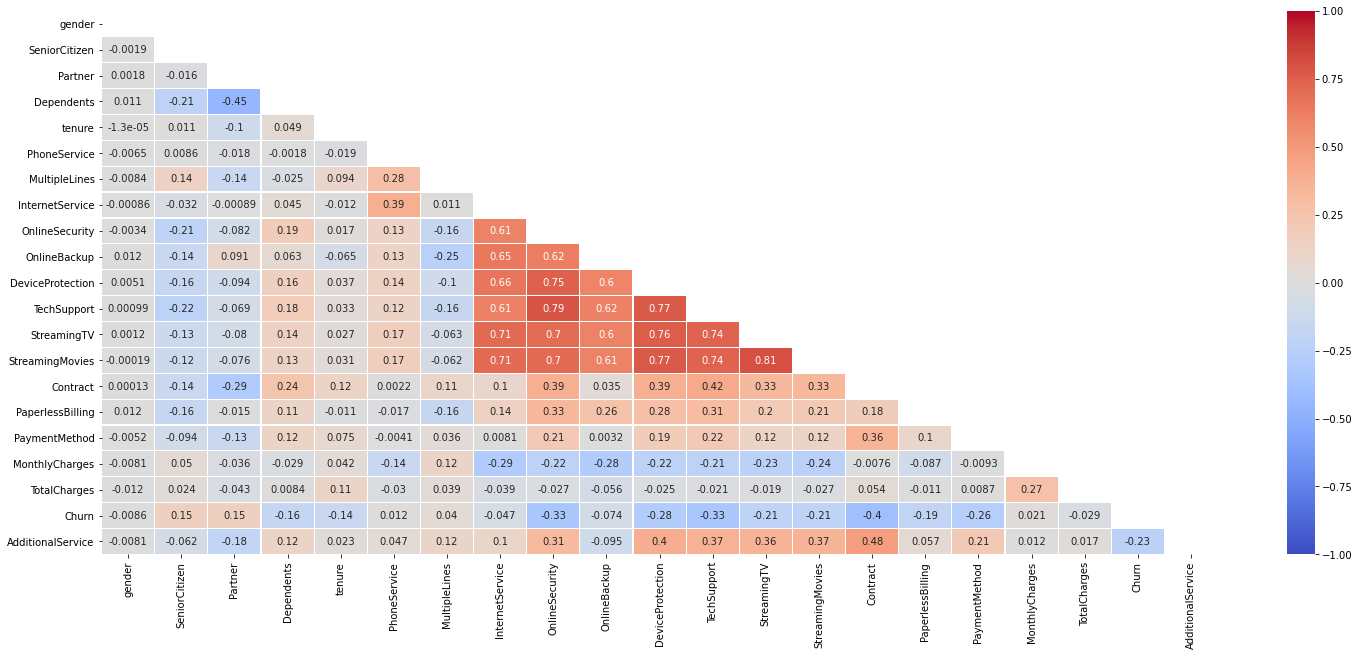

In [ ]:
plt.figure(figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
data.corr()['Churn'].sort_values(ascending = False)

Churn                1.000000
Contract             0.396713
MonthlyCharges       0.193356
PaperlessBilling     0.191825
SeniorCitizen        0.150889
MultipleLines        0.040102
PhoneService         0.011942
gender               0.008612
StreamingTV         -0.036581
StreamingMovies     -0.038492
InternetService     -0.047291
AdditionalService   -0.087698
PaymentMethod       -0.094869
Partner             -0.150448
Dependents          -0.164221
DeviceProtection    -0.178134
OnlineBackup        -0.195525
TotalCharges        -0.198347
TechSupport         -0.282492
OnlineSecurity      -0.289309
tenure              -0.352229
Name: Churn, dtype: float64

# 4. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
y = data['Churn']
X = data.drop('Churn',axis=1)
X.shape, y.shape
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=2056)
X_train_o,y_train_o = smote.fit_sample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_o.shape, y_train_o.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_o).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4930, 20) (4930,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7244, 20) (7244,)
SMOTE 적용 후 레이블 값 분포: 
 0    3622
1    3622
Name: Churn, dtype: int64


# 5. 모델 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, recall_score
from sklearn.metrics import roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2:.2f},\
    F1: {3:.2f},  AUC:{4:.2f}'.format(accuracy, precision, recall, f1, roc_auc))

- Precision_Recall_Curveplot

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix,f1_score

def get_clf_val(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print('오차행렬:\n', confusion)
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}, f1_score:{3:.2f}'.format(accuracy,precision,recall,f1))

0 : 이탈안한놈 / 1: 이탈한놈
컬럼이 : 예측, 로우: 정답

- 성능 평가지표 : recall

- 회사의 입장에선 이탈을 했는데 이탈을 안했다고 한것을 알아야 운영비용의 낭비가 줄어든다 

# 6. 모델링

## 1) KNN modeling

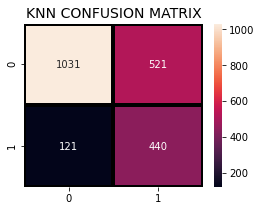

오차 행렬
[[1031  521]
 [ 121  440]]
정확도: 0.70, 정밀도: 0.46, 재현율: 0.78,    F1: 0.58,  AUC:0.79


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, recall_score
from sklearn.metrics import roc_auc_score
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train_o,y_train_o)
knn_pred = knn_model.predict(X_test)
knn_pred_proba = knn_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CONFUSION MATRIX",fontsize=14)
plt.show()
get_clf_eval(y_test, knn_pred, knn_pred_proba)

### KNN - GridSearchCV()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid=params, cv=5)
knn_cv.fit(X_train, y_train)
knn_best_est = knn_cv.best_estimator_

knn_pred = knn_cv.predict(X_test)
knn_pred_proba = knn_cv.predict_proba(X_test)

print('KNN Best number of neighbors: ', knn_cv.best_params_, '\n')

### KNN 모델개선

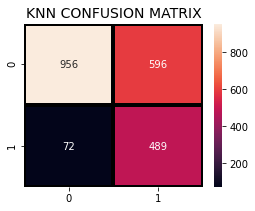

오차 행렬
[[956 596]
 [ 72 489]]
정확도: 0.68, 정밀도: 0.45, 재현율: 0.87,    F1: 0.59,  AUC:0.83


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, recall_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
knn_model_r = KNeighborsClassifier(n_neighbors = 98) 
knn_model_r.fit(X_train_o,y_train_o)
knn_pred_r = knn_model_r.predict(X_test)
knn_pred_proba_r = knn_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CONFUSION MATRIX",fontsize=14)
plt.show()
get_clf_eval(y_test, knn_pred_r, knn_pred_proba_r)

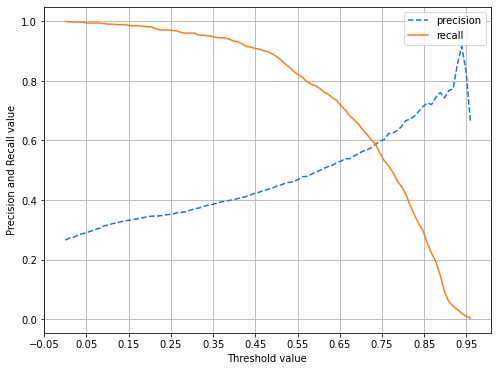

In [ ]:
precision_recall_curve_plot( y_test, knn_pred_proba_r)

## DecisionTree Modeling

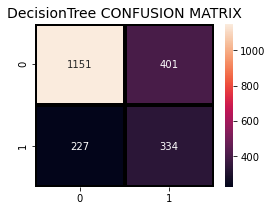

오차 행렬
[[1151  401]
 [ 227  334]]
정확도: 0.70, 정밀도: 0.45, 재현율: 0.60,    F1: 0.52,  AUC:0.67


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_o,y_train_o)
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DecisionTree CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, dt_pred, dt_pred_proba)

### DecisionTree - GridSearchCV()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [2,4,6,8,10,12,14], 'min_samples_split':[2,4,6,8,16], 'min_samples_leaf':[2,4,6,8]}

grid_cv = GridSearchCV(dt_model, param_grid=params, scoring='recall', cv=5, verbose=1 )
grid_cv.fit(X_train_o , y_train_o)
dt_pred = dt_model.predict(X_test)

print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

### DecisionTree 모델개선

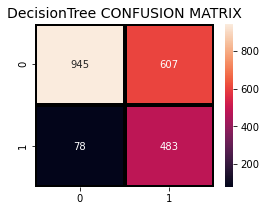

오차 행렬
[[945 607]
 [ 78 483]]
정확도: 0.68, 정밀도: 0.44, 재현율: 0.86,    F1: 0.59,  AUC:0.73


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model_r = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2)
dt_model_r.fit(X_train_o,y_train_o)
dt_pred_r = dt_model_r.predict(X_test)
dt_pred_proba_r = dt_model_r.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DecisionTree CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, dt_pred_r, dt_pred_proba_r)

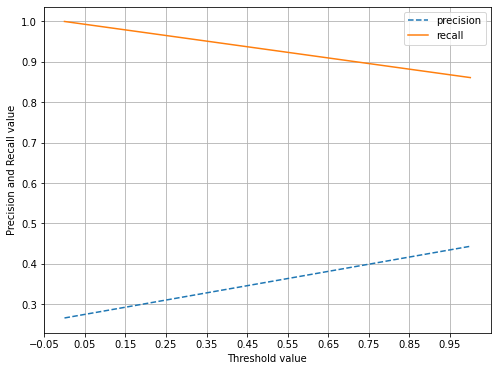

In [ ]:
precision_recall_curve_plot( y_test, dt_pred_proba_r)

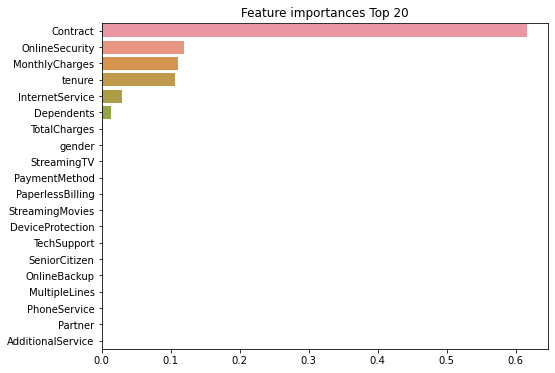

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# 앞으로 계속 중요도 시각화를 죽 계속할 건데 이 코드를 계속 비슷하게 사용한다고 생각하면 됨
ftr_importances_values = dt_model_r.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_o.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## XGBoost

[0]	validation_0-auc:0.84808	validation_1-auc:0.82602
[1]	validation_0-auc:0.84851	validation_1-auc:0.82591
[2]	validation_0-auc:0.84986	validation_1-auc:0.82770
[3]	validation_0-auc:0.85077	validation_1-auc:0.83030
[4]	validation_0-auc:0.85286	validation_1-auc:0.83182
[5]	validation_0-auc:0.85367	validation_1-auc:0.83278
[6]	validation_0-auc:0.85402	validation_1-auc:0.83282
[7]	validation_0-auc:0.85498	validation_1-auc:0.83274
[8]	validation_0-auc:0.85458	validation_1-auc:0.83268
[9]	validation_0-auc:0.85525	validation_1-auc:0.83257
[10]	validation_0-auc:0.85563	validation_1-auc:0.83286
[11]	validation_0-auc:0.85701	validation_1-auc:0.83347
[12]	validation_0-auc:0.85703	validation_1-auc:0.83364
[13]	validation_0-auc:0.85760	validation_1-auc:0.83370
[14]	validation_0-auc:0.85794	validation_1-auc:0.83343
[15]	validation_0-auc:0.85849	validation_1-auc:0.83386
[16]	validation_0-auc:0.85852	validation_1-auc:0.83387
[17]	validation_0-auc:0.85885	validation_1-auc:0.83381
[18]	validation_0-au

[149]	validation_0-auc:0.89601	validation_1-auc:0.84390
[150]	validation_0-auc:0.89627	validation_1-auc:0.84387
[151]	validation_0-auc:0.89648	validation_1-auc:0.84380
[152]	validation_0-auc:0.89668	validation_1-auc:0.84380
[153]	validation_0-auc:0.89686	validation_1-auc:0.84383
[154]	validation_0-auc:0.89708	validation_1-auc:0.84386
[155]	validation_0-auc:0.89716	validation_1-auc:0.84391
[156]	validation_0-auc:0.89743	validation_1-auc:0.84382
[157]	validation_0-auc:0.89750	validation_1-auc:0.84382
[158]	validation_0-auc:0.89772	validation_1-auc:0.84389
[159]	validation_0-auc:0.89790	validation_1-auc:0.84390
[160]	validation_0-auc:0.89809	validation_1-auc:0.84391
[161]	validation_0-auc:0.89822	validation_1-auc:0.84393
[162]	validation_0-auc:0.89834	validation_1-auc:0.84385
[163]	validation_0-auc:0.89846	validation_1-auc:0.84381
[164]	validation_0-auc:0.89860	validation_1-auc:0.84384
[165]	validation_0-auc:0.89872	validation_1-auc:0.84382
[166]	validation_0-auc:0.89882	validation_1-auc:

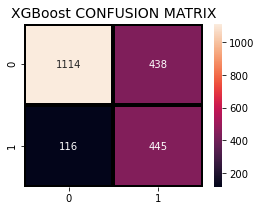

오차 행렬
[[1114  438]
 [ 116  445]]
정확도: 0.74, 정밀도: 0.50, 재현율: 0.79,    F1: 0.62,  AUC:0.84


In [ ]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier(n_estimators=500,random_state=156,learning_rate = 0.02, max_depth=5)
xgb_model.fit(X_train_o, y_train_o, early_stopping_rounds=100,
             eval_metric='auc', eval_set=[(X_train_o,y_train_o),(X_test,y_test)])
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

### XGBM_GridSearch()

In [ ]:
from xgboost import XGBClassifier
xgb_clf =XGBClassifier(n_estimators=100,learning_rate = 0.02)

params = {'max_depth': [4,6,8,10,12,14,16],  
          'min_child_weight':[1,3], 
          'colsample_bytree': [0.25,0.5, 0.75]}

xgb_cv = GridSearchCV(xgb_clf, param_grid=params, cv=5, verbose=1 )

xgb_cv.fit(X_train_o,y_train_o, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train_o, y_train_o),(X_test,y_test)])


xgb_roc_score = roc_auc_score(y_test, xgb_cv.predict_proba(X_test)[:,1], average ='macro')
print("ROC AUC: {0:4f}".format(xgb_roc_score))
print('GridSearchCV 최적 파라미터:', xgb_cv.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[0]	validation_0-auc:0.74340	validation_1-auc:0.71579
[1]	validation_0-auc:0.81529	validation_1-auc:0.80448
[2]	validation_0-auc:0.82679	validation_1-auc:0.81451
[3]	validation_0-auc:0.84052	validation_1-auc:0.82858
[4]	validation_0-auc:0.84272	validation_1-auc:0.83172
[5]	validation_0-auc:0.84695	validation_1-auc:0.83683
[6]	validation_0-auc:0.84681	validation_1-auc:0.83485
[7]	validation_0-auc:0.84761	validation_1-auc:0.83430
[8]	validation_0-auc:0.84812	validation_1-auc:0.83365
[9]	validation_0-auc:0.84579	validation_1-auc:0.83105
[10]	validation_0-auc:0.84515	validation_1-auc:0.83095
[11]	validation_0-auc:0.85037	validation_1-auc:0.83534
[12]	validation_0-auc:0.85016	validation_1-auc:0.83443
[13]	validation_0-auc:0.85060	validation_1-auc:0.83607
[14]	validation_0-auc:0.85157	validation_1-auc:0.83756
[15]	validation_0-auc:0.85305	validation_1-auc:0.83920
[16]	validation_0-auc:0.85427	validation_1-auc:0.84080
[17]	validati

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[36]	validation_0-auc:0.85977	validation_1-auc:0.84287
[37]	validation_0-auc:0.85954	validation_1-auc:0.84293
[38]	validation_0-auc:0.85899	validation_1-auc:0.84223
[39]	validation_0-auc:0.85871	validation_1-auc:0.84178
[40]	validation_0-auc:0.85866	validation_1-auc:0.84222
[41]	validation_0-auc:0.85826	validation_1-auc:0.84201
[42]	validation_0-auc:0.85808	validation_1-auc:0.84168
[43]	validation_0-auc:0.85852	validation_1-auc:0.84228
[44]	validation_0-auc:0.85892	validation_1-auc:0.84276
[45]	validation_0-auc:0.85870	validation_1-auc:0.84250
[46]	validation_0-auc:0.85886	validation_1-auc:0.84286
[47]	validation_0-auc:0.85887	validation_1-auc:0.84279
[48]	validation_0-auc:0.85901	validation_1-auc:0.84281
[49]	validation_0-auc:0.85995	validation_1-auc:0.84336
[50]	validation_0-auc:0.86028	validation_1-auc:0.84379
[51]	validation_0-auc:0.86032	validation_1-auc:0.84407
[52]	validation_0-auc:0.86066	validation_1-auc:0.84451
[53]	validation_0-auc:0.86063	validation_1-auc:0.84461
[54]	valid

[86]	validation_0-auc:0.86488	validation_1-auc:0.84405
[87]	validation_0-auc:0.86512	validation_1-auc:0.84420
[88]	validation_0-auc:0.86511	validation_1-auc:0.84411
[89]	validation_0-auc:0.86562	validation_1-auc:0.84445
[90]	validation_0-auc:0.86557	validation_1-auc:0.84419
[91]	validation_0-auc:0.86585	validation_1-auc:0.84423
[92]	validation_0-auc:0.86625	validation_1-auc:0.84439
[93]	validation_0-auc:0.86615	validation_1-auc:0.84443
[94]	validation_0-auc:0.86662	validation_1-auc:0.84449
[95]	validation_0-auc:0.86667	validation_1-auc:0.84466
[96]	validation_0-auc:0.86685	validation_1-auc:0.84468
[97]	validation_0-auc:0.86694	validation_1-auc:0.84471
[98]	validation_0-auc:0.86697	validation_1-auc:0.84451
[99]	validation_0-auc:0.86708	validation_1-auc:0.84432
[0]	validation_0-auc:0.75269	validation_1-auc:0.71496
[1]	validation_0-auc:0.81682	validation_1-auc:0.80267
[2]	validation_0-auc:0.82915	validation_1-auc:0.81355
[3]	validation_0-auc:0.84141	validation_1-auc:0.82794
[4]	validation

[36]	validation_0-auc:0.85796	validation_1-auc:0.84419
[37]	validation_0-auc:0.85781	validation_1-auc:0.84427
[38]	validation_0-auc:0.85724	validation_1-auc:0.84374
[39]	validation_0-auc:0.85702	validation_1-auc:0.84327
[40]	validation_0-auc:0.85700	validation_1-auc:0.84385
[41]	validation_0-auc:0.85655	validation_1-auc:0.84347
[42]	validation_0-auc:0.85640	validation_1-auc:0.84305
[43]	validation_0-auc:0.85684	validation_1-auc:0.84384
[44]	validation_0-auc:0.85711	validation_1-auc:0.84432
[45]	validation_0-auc:0.85697	validation_1-auc:0.84430
[46]	validation_0-auc:0.85718	validation_1-auc:0.84483
[47]	validation_0-auc:0.85705	validation_1-auc:0.84463
[48]	validation_0-auc:0.85709	validation_1-auc:0.84451
[49]	validation_0-auc:0.85803	validation_1-auc:0.84514
[50]	validation_0-auc:0.85831	validation_1-auc:0.84545
[51]	validation_0-auc:0.85835	validation_1-auc:0.84573
[52]	validation_0-auc:0.85869	validation_1-auc:0.84598
[53]	validation_0-auc:0.85870	validation_1-auc:0.84607
[54]	valid

[86]	validation_0-auc:0.86323	validation_1-auc:0.84900
[87]	validation_0-auc:0.86342	validation_1-auc:0.84903
[88]	validation_0-auc:0.86340	validation_1-auc:0.84888
[89]	validation_0-auc:0.86385	validation_1-auc:0.84911
[90]	validation_0-auc:0.86386	validation_1-auc:0.84893
[91]	validation_0-auc:0.86413	validation_1-auc:0.84895
[92]	validation_0-auc:0.86447	validation_1-auc:0.84892
[93]	validation_0-auc:0.86439	validation_1-auc:0.84903
[94]	validation_0-auc:0.86489	validation_1-auc:0.84925
[95]	validation_0-auc:0.86490	validation_1-auc:0.84943
[96]	validation_0-auc:0.86506	validation_1-auc:0.84943
[97]	validation_0-auc:0.86514	validation_1-auc:0.84942
[98]	validation_0-auc:0.86522	validation_1-auc:0.84927
[99]	validation_0-auc:0.86535	validation_1-auc:0.84912
[0]	validation_0-auc:0.74340	validation_1-auc:0.71579
[1]	validation_0-auc:0.81502	validation_1-auc:0.80425
[2]	validation_0-auc:0.82646	validation_1-auc:0.81426
[3]	validation_0-auc:0.84002	validation_1-auc:0.82842
[4]	validation

[36]	validation_0-auc:0.85795	validation_1-auc:0.84142
[37]	validation_0-auc:0.85773	validation_1-auc:0.84151
[38]	validation_0-auc:0.85708	validation_1-auc:0.84088
[39]	validation_0-auc:0.85677	validation_1-auc:0.84040
[40]	validation_0-auc:0.85685	validation_1-auc:0.84109
[41]	validation_0-auc:0.85640	validation_1-auc:0.84074
[42]	validation_0-auc:0.85635	validation_1-auc:0.84054
[43]	validation_0-auc:0.85692	validation_1-auc:0.84123
[44]	validation_0-auc:0.85726	validation_1-auc:0.84174
[45]	validation_0-auc:0.85709	validation_1-auc:0.84130
[46]	validation_0-auc:0.85715	validation_1-auc:0.84143
[47]	validation_0-auc:0.85716	validation_1-auc:0.84130
[48]	validation_0-auc:0.85720	validation_1-auc:0.84112
[49]	validation_0-auc:0.85815	validation_1-auc:0.84170
[50]	validation_0-auc:0.85845	validation_1-auc:0.84195
[51]	validation_0-auc:0.85857	validation_1-auc:0.84246
[52]	validation_0-auc:0.85906	validation_1-auc:0.84273
[53]	validation_0-auc:0.85906	validation_1-auc:0.84285
[54]	valid

[86]	validation_0-auc:0.86340	validation_1-auc:0.84806
[87]	validation_0-auc:0.86362	validation_1-auc:0.84825
[88]	validation_0-auc:0.86357	validation_1-auc:0.84813
[89]	validation_0-auc:0.86399	validation_1-auc:0.84830
[90]	validation_0-auc:0.86403	validation_1-auc:0.84816
[91]	validation_0-auc:0.86430	validation_1-auc:0.84826
[92]	validation_0-auc:0.86455	validation_1-auc:0.84830
[93]	validation_0-auc:0.86446	validation_1-auc:0.84841
[94]	validation_0-auc:0.86484	validation_1-auc:0.84846
[95]	validation_0-auc:0.86491	validation_1-auc:0.84853
[96]	validation_0-auc:0.86504	validation_1-auc:0.84845
[97]	validation_0-auc:0.86508	validation_1-auc:0.84843
[98]	validation_0-auc:0.86519	validation_1-auc:0.84835
[99]	validation_0-auc:0.86534	validation_1-auc:0.84819
[0]	validation_0-auc:0.75416	validation_1-auc:0.72210
[1]	validation_0-auc:0.81779	validation_1-auc:0.80331
[2]	validation_0-auc:0.82805	validation_1-auc:0.81250
[3]	validation_0-auc:0.84094	validation_1-auc:0.82721
[4]	validation

[36]	validation_0-auc:0.85696	validation_1-auc:0.84539
[37]	validation_0-auc:0.85675	validation_1-auc:0.84541
[38]	validation_0-auc:0.85612	validation_1-auc:0.84484
[39]	validation_0-auc:0.85582	validation_1-auc:0.84444
[40]	validation_0-auc:0.85584	validation_1-auc:0.84510
[41]	validation_0-auc:0.85547	validation_1-auc:0.84461
[42]	validation_0-auc:0.85533	validation_1-auc:0.84407
[43]	validation_0-auc:0.85583	validation_1-auc:0.84477
[44]	validation_0-auc:0.85620	validation_1-auc:0.84512
[45]	validation_0-auc:0.85595	validation_1-auc:0.84505
[46]	validation_0-auc:0.85613	validation_1-auc:0.84546
[47]	validation_0-auc:0.85595	validation_1-auc:0.84539
[48]	validation_0-auc:0.85596	validation_1-auc:0.84536
[49]	validation_0-auc:0.85685	validation_1-auc:0.84591
[50]	validation_0-auc:0.85713	validation_1-auc:0.84615
[51]	validation_0-auc:0.85718	validation_1-auc:0.84638
[52]	validation_0-auc:0.85760	validation_1-auc:0.84661
[53]	validation_0-auc:0.85756	validation_1-auc:0.84666
[54]	valid

[86]	validation_0-auc:0.89088	validation_1-auc:0.84354
[87]	validation_0-auc:0.89121	validation_1-auc:0.84364
[88]	validation_0-auc:0.89109	validation_1-auc:0.84347
[89]	validation_0-auc:0.89172	validation_1-auc:0.84371
[0]	validation_0-auc:0.77234	validation_1-auc:0.72943
[1]	validation_0-auc:0.83040	validation_1-auc:0.79884
[2]	validation_0-auc:0.85041	validation_1-auc:0.81231
[3]	validation_0-auc:0.86133	validation_1-auc:0.82776
[4]	validation_0-auc:0.86306	validation_1-auc:0.83120
[5]	validation_0-auc:0.86820	validation_1-auc:0.83584
[6]	validation_0-auc:0.86546	validation_1-auc:0.83481
[7]	validation_0-auc:0.86506	validation_1-auc:0.83414
[8]	validation_0-auc:0.86366	validation_1-auc:0.83248
[9]	validation_0-auc:0.86066	validation_1-auc:0.83035
[10]	validation_0-auc:0.85963	validation_1-auc:0.82943
[11]	validation_0-auc:0.86549	validation_1-auc:0.83383
[12]	validation_0-auc:0.86391	validation_1-auc:0.83270
[13]	validation_0-auc:0.86438	validation_1-auc:0.83484
[14]	validation_0-au

[46]	validation_0-auc:0.87662	validation_1-auc:0.84532
[47]	validation_0-auc:0.87633	validation_1-auc:0.84517
[48]	validation_0-auc:0.87653	validation_1-auc:0.84504
[49]	validation_0-auc:0.87748	validation_1-auc:0.84546
[50]	validation_0-auc:0.87783	validation_1-auc:0.84557
[51]	validation_0-auc:0.87775	validation_1-auc:0.84579
[52]	validation_0-auc:0.87842	validation_1-auc:0.84595
[53]	validation_0-auc:0.87824	validation_1-auc:0.84598
[54]	validation_0-auc:0.87790	validation_1-auc:0.84578
[55]	validation_0-auc:0.87815	validation_1-auc:0.84583
[56]	validation_0-auc:0.87781	validation_1-auc:0.84555
[57]	validation_0-auc:0.87861	validation_1-auc:0.84602
[58]	validation_0-auc:0.87859	validation_1-auc:0.84638
[59]	validation_0-auc:0.87926	validation_1-auc:0.84681
[60]	validation_0-auc:0.87953	validation_1-auc:0.84673
[61]	validation_0-auc:0.87991	validation_1-auc:0.84662
[62]	validation_0-auc:0.87972	validation_1-auc:0.84635
[63]	validation_0-auc:0.88004	validation_1-auc:0.84641
[64]	valid

[96]	validation_0-auc:0.88997	validation_1-auc:0.84857
[97]	validation_0-auc:0.89003	validation_1-auc:0.84854
[98]	validation_0-auc:0.89010	validation_1-auc:0.84847
[99]	validation_0-auc:0.89019	validation_1-auc:0.84840
[0]	validation_0-auc:0.77248	validation_1-auc:0.73367
[1]	validation_0-auc:0.82983	validation_1-auc:0.80443
[2]	validation_0-auc:0.84597	validation_1-auc:0.81777
[3]	validation_0-auc:0.85779	validation_1-auc:0.83107
[4]	validation_0-auc:0.85966	validation_1-auc:0.83299
[5]	validation_0-auc:0.86469	validation_1-auc:0.83858
[6]	validation_0-auc:0.86232	validation_1-auc:0.83684
[7]	validation_0-auc:0.86171	validation_1-auc:0.83624
[8]	validation_0-auc:0.86036	validation_1-auc:0.83465
[9]	validation_0-auc:0.85731	validation_1-auc:0.83203
[10]	validation_0-auc:0.85627	validation_1-auc:0.83118
[11]	validation_0-auc:0.86207	validation_1-auc:0.83574
[12]	validation_0-auc:0.86027	validation_1-auc:0.83400
[13]	validation_0-auc:0.86082	validation_1-auc:0.83585
[14]	validation_0-au

[46]	validation_0-auc:0.87791	validation_1-auc:0.84178
[47]	validation_0-auc:0.87751	validation_1-auc:0.84156
[48]	validation_0-auc:0.87778	validation_1-auc:0.84170
[49]	validation_0-auc:0.87894	validation_1-auc:0.84220
[50]	validation_0-auc:0.87953	validation_1-auc:0.84262
[51]	validation_0-auc:0.87949	validation_1-auc:0.84291
[52]	validation_0-auc:0.88050	validation_1-auc:0.84328
[53]	validation_0-auc:0.88026	validation_1-auc:0.84331
[54]	validation_0-auc:0.87987	validation_1-auc:0.84301
[55]	validation_0-auc:0.88012	validation_1-auc:0.84306
[56]	validation_0-auc:0.87973	validation_1-auc:0.84280
[57]	validation_0-auc:0.88073	validation_1-auc:0.84322
[58]	validation_0-auc:0.88067	validation_1-auc:0.84360
[59]	validation_0-auc:0.88141	validation_1-auc:0.84387
[60]	validation_0-auc:0.88172	validation_1-auc:0.84393
[61]	validation_0-auc:0.88221	validation_1-auc:0.84378
[62]	validation_0-auc:0.88193	validation_1-auc:0.84349
[63]	validation_0-auc:0.88233	validation_1-auc:0.84366
[64]	valid

[6]	validation_0-auc:0.86313	validation_1-auc:0.83451
[7]	validation_0-auc:0.86265	validation_1-auc:0.83387
[8]	validation_0-auc:0.86133	validation_1-auc:0.83245
[9]	validation_0-auc:0.85843	validation_1-auc:0.83015
[10]	validation_0-auc:0.85742	validation_1-auc:0.82929
[11]	validation_0-auc:0.86359	validation_1-auc:0.83405
[12]	validation_0-auc:0.86226	validation_1-auc:0.83304
[13]	validation_0-auc:0.86249	validation_1-auc:0.83510
[14]	validation_0-auc:0.86419	validation_1-auc:0.83675
[15]	validation_0-auc:0.86681	validation_1-auc:0.83897
[16]	validation_0-auc:0.86869	validation_1-auc:0.84100
[17]	validation_0-auc:0.86828	validation_1-auc:0.84035
[18]	validation_0-auc:0.86967	validation_1-auc:0.84133
[19]	validation_0-auc:0.86984	validation_1-auc:0.84074
[20]	validation_0-auc:0.86942	validation_1-auc:0.84117
[21]	validation_0-auc:0.87182	validation_1-auc:0.84246
[22]	validation_0-auc:0.87343	validation_1-auc:0.84284
[23]	validation_0-auc:0.87404	validation_1-auc:0.84292
[24]	validatio

[56]	validation_0-auc:0.87702	validation_1-auc:0.84595
[57]	validation_0-auc:0.87792	validation_1-auc:0.84643
[58]	validation_0-auc:0.87792	validation_1-auc:0.84660
[59]	validation_0-auc:0.87865	validation_1-auc:0.84711
[60]	validation_0-auc:0.87886	validation_1-auc:0.84720
[61]	validation_0-auc:0.87915	validation_1-auc:0.84697
[62]	validation_0-auc:0.87894	validation_1-auc:0.84674
[63]	validation_0-auc:0.87930	validation_1-auc:0.84689
[64]	validation_0-auc:0.87933	validation_1-auc:0.84698
[65]	validation_0-auc:0.87956	validation_1-auc:0.84685
[66]	validation_0-auc:0.88025	validation_1-auc:0.84713
[67]	validation_0-auc:0.88035	validation_1-auc:0.84697
[68]	validation_0-auc:0.88077	validation_1-auc:0.84701
[69]	validation_0-auc:0.88151	validation_1-auc:0.84735
[70]	validation_0-auc:0.88176	validation_1-auc:0.84730
[71]	validation_0-auc:0.88189	validation_1-auc:0.84734
[72]	validation_0-auc:0.88227	validation_1-auc:0.84720
[73]	validation_0-auc:0.88278	validation_1-auc:0.84754
[74]	valid

[6]	validation_0-auc:0.88301	validation_1-auc:0.83063
[7]	validation_0-auc:0.88108	validation_1-auc:0.83095
[8]	validation_0-auc:0.87924	validation_1-auc:0.83004
[9]	validation_0-auc:0.87557	validation_1-auc:0.82779
[10]	validation_0-auc:0.87385	validation_1-auc:0.82735
[11]	validation_0-auc:0.88321	validation_1-auc:0.83173
[12]	validation_0-auc:0.88064	validation_1-auc:0.83093
[13]	validation_0-auc:0.87974	validation_1-auc:0.83282
[14]	validation_0-auc:0.88293	validation_1-auc:0.83430
[15]	validation_0-auc:0.88682	validation_1-auc:0.83693
[16]	validation_0-auc:0.89033	validation_1-auc:0.83823
[17]	validation_0-auc:0.88914	validation_1-auc:0.83745
[18]	validation_0-auc:0.89209	validation_1-auc:0.83779
[19]	validation_0-auc:0.89248	validation_1-auc:0.83716
[20]	validation_0-auc:0.89128	validation_1-auc:0.83745
[21]	validation_0-auc:0.89449	validation_1-auc:0.83906
[22]	validation_0-auc:0.89784	validation_1-auc:0.83964
[23]	validation_0-auc:0.89834	validation_1-auc:0.83961
[24]	validatio

[56]	validation_0-auc:0.90223	validation_1-auc:0.84117
[57]	validation_0-auc:0.90334	validation_1-auc:0.84146
[58]	validation_0-auc:0.90328	validation_1-auc:0.84159
[59]	validation_0-auc:0.90398	validation_1-auc:0.84200
[60]	validation_0-auc:0.90480	validation_1-auc:0.84200
[61]	validation_0-auc:0.90548	validation_1-auc:0.84183
[62]	validation_0-auc:0.90504	validation_1-auc:0.84153
[63]	validation_0-auc:0.90575	validation_1-auc:0.84188
[64]	validation_0-auc:0.90563	validation_1-auc:0.84200
[65]	validation_0-auc:0.90631	validation_1-auc:0.84174
[66]	validation_0-auc:0.90717	validation_1-auc:0.84212
[67]	validation_0-auc:0.90709	validation_1-auc:0.84198
[68]	validation_0-auc:0.90757	validation_1-auc:0.84191
[69]	validation_0-auc:0.90855	validation_1-auc:0.84223
[70]	validation_0-auc:0.90909	validation_1-auc:0.84209
[71]	validation_0-auc:0.90936	validation_1-auc:0.84234
[72]	validation_0-auc:0.90975	validation_1-auc:0.84219
[73]	validation_0-auc:0.91070	validation_1-auc:0.84240
[74]	valid

[6]	validation_0-auc:0.88162	validation_1-auc:0.83161
[7]	validation_0-auc:0.87989	validation_1-auc:0.83203
[8]	validation_0-auc:0.87777	validation_1-auc:0.83111
[9]	validation_0-auc:0.87373	validation_1-auc:0.82892
[10]	validation_0-auc:0.87216	validation_1-auc:0.82852
[11]	validation_0-auc:0.88047	validation_1-auc:0.83359
[12]	validation_0-auc:0.87821	validation_1-auc:0.83281
[13]	validation_0-auc:0.87748	validation_1-auc:0.83490
[14]	validation_0-auc:0.88083	validation_1-auc:0.83686
[15]	validation_0-auc:0.88535	validation_1-auc:0.83881
[16]	validation_0-auc:0.88880	validation_1-auc:0.84110
[17]	validation_0-auc:0.88748	validation_1-auc:0.84062
[18]	validation_0-auc:0.89047	validation_1-auc:0.84098
[19]	validation_0-auc:0.89096	validation_1-auc:0.84043
[20]	validation_0-auc:0.88974	validation_1-auc:0.84069
[21]	validation_0-auc:0.89365	validation_1-auc:0.84221
[22]	validation_0-auc:0.89622	validation_1-auc:0.84242
[23]	validation_0-auc:0.89679	validation_1-auc:0.84227
[24]	validatio

[56]	validation_0-auc:0.89985	validation_1-auc:0.84495
[57]	validation_0-auc:0.90094	validation_1-auc:0.84537
[58]	validation_0-auc:0.90087	validation_1-auc:0.84567
[59]	validation_0-auc:0.90188	validation_1-auc:0.84592
[60]	validation_0-auc:0.90252	validation_1-auc:0.84604
[61]	validation_0-auc:0.90299	validation_1-auc:0.84582
[62]	validation_0-auc:0.90255	validation_1-auc:0.84560
[63]	validation_0-auc:0.90326	validation_1-auc:0.84581
[64]	validation_0-auc:0.90316	validation_1-auc:0.84608
[65]	validation_0-auc:0.90374	validation_1-auc:0.84608
[66]	validation_0-auc:0.90463	validation_1-auc:0.84633
[67]	validation_0-auc:0.90460	validation_1-auc:0.84632
[68]	validation_0-auc:0.90522	validation_1-auc:0.84609
[69]	validation_0-auc:0.90628	validation_1-auc:0.84660
[70]	validation_0-auc:0.90675	validation_1-auc:0.84654
[71]	validation_0-auc:0.90723	validation_1-auc:0.84668
[72]	validation_0-auc:0.90772	validation_1-auc:0.84645
[73]	validation_0-auc:0.90855	validation_1-auc:0.84669
[74]	valid

[6]	validation_0-auc:0.87897	validation_1-auc:0.83124
[7]	validation_0-auc:0.87719	validation_1-auc:0.83095
[8]	validation_0-auc:0.87509	validation_1-auc:0.82984
[9]	validation_0-auc:0.87144	validation_1-auc:0.82771
[10]	validation_0-auc:0.86962	validation_1-auc:0.82698
[11]	validation_0-auc:0.87709	validation_1-auc:0.83220
[12]	validation_0-auc:0.87495	validation_1-auc:0.83110
[13]	validation_0-auc:0.87463	validation_1-auc:0.83312
[14]	validation_0-auc:0.87776	validation_1-auc:0.83523
[15]	validation_0-auc:0.88194	validation_1-auc:0.83737
[16]	validation_0-auc:0.88482	validation_1-auc:0.83895
[17]	validation_0-auc:0.88375	validation_1-auc:0.83837
[18]	validation_0-auc:0.88610	validation_1-auc:0.83860
[19]	validation_0-auc:0.88638	validation_1-auc:0.83783
[20]	validation_0-auc:0.88540	validation_1-auc:0.83798
[21]	validation_0-auc:0.88878	validation_1-auc:0.83911
[22]	validation_0-auc:0.89180	validation_1-auc:0.83917
[23]	validation_0-auc:0.89232	validation_1-auc:0.83913
[24]	validatio

[94]	validation_0-auc:0.90901	validation_1-auc:0.84682
[95]	validation_0-auc:0.90897	validation_1-auc:0.84684
[96]	validation_0-auc:0.90896	validation_1-auc:0.84683
[97]	validation_0-auc:0.90894	validation_1-auc:0.84679
[98]	validation_0-auc:0.90890	validation_1-auc:0.84675
[99]	validation_0-auc:0.90892	validation_1-auc:0.84666
[0]	validation_0-auc:0.77624	validation_1-auc:0.73094
[1]	validation_0-auc:0.84196	validation_1-auc:0.79993
[2]	validation_0-auc:0.86209	validation_1-auc:0.81163
[3]	validation_0-auc:0.87275	validation_1-auc:0.82589
[4]	validation_0-auc:0.87465	validation_1-auc:0.82875
[5]	validation_0-auc:0.88095	validation_1-auc:0.83337
[6]	validation_0-auc:0.87722	validation_1-auc:0.83274
[7]	validation_0-auc:0.87555	validation_1-auc:0.83269
[8]	validation_0-auc:0.87379	validation_1-auc:0.83176
[9]	validation_0-auc:0.86989	validation_1-auc:0.82973
[10]	validation_0-auc:0.86846	validation_1-auc:0.82927
[11]	validation_0-auc:0.87622	validation_1-auc:0.83463
[12]	validation_0-au

[44]	validation_0-auc:0.89196	validation_1-auc:0.84462
[45]	validation_0-auc:0.89138	validation_1-auc:0.84444
[46]	validation_0-auc:0.89197	validation_1-auc:0.84454
[47]	validation_0-auc:0.89142	validation_1-auc:0.84441
[48]	validation_0-auc:0.89183	validation_1-auc:0.84417
[49]	validation_0-auc:0.89329	validation_1-auc:0.84461
[50]	validation_0-auc:0.89367	validation_1-auc:0.84485
[51]	validation_0-auc:0.89336	validation_1-auc:0.84504
[52]	validation_0-auc:0.89461	validation_1-auc:0.84535
[53]	validation_0-auc:0.89425	validation_1-auc:0.84540
[54]	validation_0-auc:0.89375	validation_1-auc:0.84518
[55]	validation_0-auc:0.89411	validation_1-auc:0.84539
[56]	validation_0-auc:0.89364	validation_1-auc:0.84508
[57]	validation_0-auc:0.89469	validation_1-auc:0.84557
[58]	validation_0-auc:0.89464	validation_1-auc:0.84576
[59]	validation_0-auc:0.89565	validation_1-auc:0.84621
[60]	validation_0-auc:0.89630	validation_1-auc:0.84620
[61]	validation_0-auc:0.89679	validation_1-auc:0.84593
[62]	valid

[94]	validation_0-auc:0.93556	validation_1-auc:0.84140
[95]	validation_0-auc:0.93541	validation_1-auc:0.84159
[96]	validation_0-auc:0.93529	validation_1-auc:0.84151
[97]	validation_0-auc:0.93519	validation_1-auc:0.84144
[98]	validation_0-auc:0.93502	validation_1-auc:0.84135
[0]	validation_0-auc:0.77741	validation_1-auc:0.73073
[1]	validation_0-auc:0.85898	validation_1-auc:0.78825
[2]	validation_0-auc:0.88357	validation_1-auc:0.80524
[3]	validation_0-auc:0.89291	validation_1-auc:0.81926
[4]	validation_0-auc:0.89712	validation_1-auc:0.82153
[5]	validation_0-auc:0.90552	validation_1-auc:0.82805
[6]	validation_0-auc:0.89974	validation_1-auc:0.82779
[7]	validation_0-auc:0.89662	validation_1-auc:0.82796
[8]	validation_0-auc:0.89343	validation_1-auc:0.82720
[9]	validation_0-auc:0.88873	validation_1-auc:0.82554
[10]	validation_0-auc:0.88626	validation_1-auc:0.82521
[11]	validation_0-auc:0.89555	validation_1-auc:0.83096
[12]	validation_0-auc:0.89248	validation_1-auc:0.83020
[13]	validation_0-au

[45]	validation_0-auc:0.91430	validation_1-auc:0.84276
[46]	validation_0-auc:0.91517	validation_1-auc:0.84287
[47]	validation_0-auc:0.91446	validation_1-auc:0.84275
[48]	validation_0-auc:0.91521	validation_1-auc:0.84252
[49]	validation_0-auc:0.91700	validation_1-auc:0.84310
[50]	validation_0-auc:0.91760	validation_1-auc:0.84341
[51]	validation_0-auc:0.91706	validation_1-auc:0.84375
[52]	validation_0-auc:0.91842	validation_1-auc:0.84344
[53]	validation_0-auc:0.91784	validation_1-auc:0.84351
[54]	validation_0-auc:0.91717	validation_1-auc:0.84340
[55]	validation_0-auc:0.91796	validation_1-auc:0.84319
[56]	validation_0-auc:0.91733	validation_1-auc:0.84290
[57]	validation_0-auc:0.91858	validation_1-auc:0.84330
[58]	validation_0-auc:0.91842	validation_1-auc:0.84356
[59]	validation_0-auc:0.91941	validation_1-auc:0.84418
[60]	validation_0-auc:0.91997	validation_1-auc:0.84414
[61]	validation_0-auc:0.92080	validation_1-auc:0.84379
[62]	validation_0-auc:0.92037	validation_1-auc:0.84364
[63]	valid

[95]	validation_0-auc:0.93403	validation_1-auc:0.84579
[96]	validation_0-auc:0.93395	validation_1-auc:0.84582
[97]	validation_0-auc:0.93383	validation_1-auc:0.84590
[98]	validation_0-auc:0.93373	validation_1-auc:0.84586
[99]	validation_0-auc:0.93366	validation_1-auc:0.84581
[0]	validation_0-auc:0.77757	validation_1-auc:0.73472
[1]	validation_0-auc:0.85636	validation_1-auc:0.79153
[2]	validation_0-auc:0.88165	validation_1-auc:0.80951
[3]	validation_0-auc:0.89128	validation_1-auc:0.82203
[4]	validation_0-auc:0.89427	validation_1-auc:0.82278
[5]	validation_0-auc:0.90226	validation_1-auc:0.82852
[6]	validation_0-auc:0.89638	validation_1-auc:0.82781
[7]	validation_0-auc:0.89302	validation_1-auc:0.82796
[8]	validation_0-auc:0.88983	validation_1-auc:0.82711
[9]	validation_0-auc:0.88475	validation_1-auc:0.82511
[10]	validation_0-auc:0.88259	validation_1-auc:0.82482
[11]	validation_0-auc:0.89357	validation_1-auc:0.82934
[12]	validation_0-auc:0.89039	validation_1-auc:0.82878
[13]	validation_0-au

[45]	validation_0-auc:0.90663	validation_1-auc:0.84056
[46]	validation_0-auc:0.90722	validation_1-auc:0.84078
[47]	validation_0-auc:0.90648	validation_1-auc:0.84052
[48]	validation_0-auc:0.90707	validation_1-auc:0.84079
[49]	validation_0-auc:0.90885	validation_1-auc:0.84134
[50]	validation_0-auc:0.90984	validation_1-auc:0.84146
[51]	validation_0-auc:0.90945	validation_1-auc:0.84169
[52]	validation_0-auc:0.91105	validation_1-auc:0.84180
[53]	validation_0-auc:0.91052	validation_1-auc:0.84187
[54]	validation_0-auc:0.90985	validation_1-auc:0.84172
[55]	validation_0-auc:0.91042	validation_1-auc:0.84156
[56]	validation_0-auc:0.90978	validation_1-auc:0.84131
[57]	validation_0-auc:0.91107	validation_1-auc:0.84153
[58]	validation_0-auc:0.91086	validation_1-auc:0.84184
[59]	validation_0-auc:0.91165	validation_1-auc:0.84220
[60]	validation_0-auc:0.91237	validation_1-auc:0.84224
[61]	validation_0-auc:0.91319	validation_1-auc:0.84169
[62]	validation_0-auc:0.91267	validation_1-auc:0.84145
[63]	valid

[36]	validation_0-auc:0.90601	validation_1-auc:0.84204
[37]	validation_0-auc:0.90516	validation_1-auc:0.84217
[38]	validation_0-auc:0.90423	validation_1-auc:0.84177
[39]	validation_0-auc:0.90354	validation_1-auc:0.84142
[40]	validation_0-auc:0.90291	validation_1-auc:0.84201
[41]	validation_0-auc:0.90216	validation_1-auc:0.84174
[42]	validation_0-auc:0.90172	validation_1-auc:0.84131
[43]	validation_0-auc:0.90300	validation_1-auc:0.84240
[44]	validation_0-auc:0.90374	validation_1-auc:0.84262
[45]	validation_0-auc:0.90304	validation_1-auc:0.84241
[46]	validation_0-auc:0.90374	validation_1-auc:0.84255
[47]	validation_0-auc:0.90309	validation_1-auc:0.84246
[48]	validation_0-auc:0.90369	validation_1-auc:0.84251
[49]	validation_0-auc:0.90529	validation_1-auc:0.84311
[50]	validation_0-auc:0.90585	validation_1-auc:0.84342
[51]	validation_0-auc:0.90542	validation_1-auc:0.84379
[52]	validation_0-auc:0.90678	validation_1-auc:0.84379
[53]	validation_0-auc:0.90629	validation_1-auc:0.84391
[54]	valid

[86]	validation_0-auc:0.91847	validation_1-auc:0.84585
[87]	validation_0-auc:0.91904	validation_1-auc:0.84587
[88]	validation_0-auc:0.91881	validation_1-auc:0.84584
[89]	validation_0-auc:0.91956	validation_1-auc:0.84580
[90]	validation_0-auc:0.91944	validation_1-auc:0.84572
[91]	validation_0-auc:0.91981	validation_1-auc:0.84568
[92]	validation_0-auc:0.92067	validation_1-auc:0.84558
[93]	validation_0-auc:0.92047	validation_1-auc:0.84566
[94]	validation_0-auc:0.92121	validation_1-auc:0.84561
[95]	validation_0-auc:0.92105	validation_1-auc:0.84581
[96]	validation_0-auc:0.92099	validation_1-auc:0.84581
[97]	validation_0-auc:0.92089	validation_1-auc:0.84582
[98]	validation_0-auc:0.92080	validation_1-auc:0.84575
[99]	validation_0-auc:0.92078	validation_1-auc:0.84576
[0]	validation_0-auc:0.77587	validation_1-auc:0.73359
[1]	validation_0-auc:0.84749	validation_1-auc:0.79480
[2]	validation_0-auc:0.87161	validation_1-auc:0.81108
[3]	validation_0-auc:0.88180	validation_1-auc:0.82241
[4]	validation

[36]	validation_0-auc:0.93173	validation_1-auc:0.83882
[37]	validation_0-auc:0.93070	validation_1-auc:0.83893
[38]	validation_0-auc:0.92959	validation_1-auc:0.83842
[39]	validation_0-auc:0.92870	validation_1-auc:0.83813
[40]	validation_0-auc:0.92792	validation_1-auc:0.83875
[41]	validation_0-auc:0.92699	validation_1-auc:0.83847
[42]	validation_0-auc:0.92633	validation_1-auc:0.83820
[43]	validation_0-auc:0.92780	validation_1-auc:0.83920
[44]	validation_0-auc:0.92911	validation_1-auc:0.83956
[45]	validation_0-auc:0.92811	validation_1-auc:0.83931
[46]	validation_0-auc:0.92889	validation_1-auc:0.83951
[47]	validation_0-auc:0.92804	validation_1-auc:0.83934
[48]	validation_0-auc:0.92875	validation_1-auc:0.83912
[49]	validation_0-auc:0.93056	validation_1-auc:0.83989
[50]	validation_0-auc:0.93150	validation_1-auc:0.83998
[51]	validation_0-auc:0.93094	validation_1-auc:0.84028
[52]	validation_0-auc:0.93273	validation_1-auc:0.83990
[53]	validation_0-auc:0.93204	validation_1-auc:0.84009
[54]	valid

[86]	validation_0-auc:0.94471	validation_1-auc:0.84240
[87]	validation_0-auc:0.94521	validation_1-auc:0.84255
[88]	validation_0-auc:0.94500	validation_1-auc:0.84248
[89]	validation_0-auc:0.94576	validation_1-auc:0.84281
[90]	validation_0-auc:0.94555	validation_1-auc:0.84258
[91]	validation_0-auc:0.94594	validation_1-auc:0.84249
[92]	validation_0-auc:0.94669	validation_1-auc:0.84232
[93]	validation_0-auc:0.94642	validation_1-auc:0.84237
[94]	validation_0-auc:0.94703	validation_1-auc:0.84257
[95]	validation_0-auc:0.94686	validation_1-auc:0.84259
[96]	validation_0-auc:0.94677	validation_1-auc:0.84257
[97]	validation_0-auc:0.94665	validation_1-auc:0.84260
[98]	validation_0-auc:0.94650	validation_1-auc:0.84259
[99]	validation_0-auc:0.94640	validation_1-auc:0.84255
[0]	validation_0-auc:0.77878	validation_1-auc:0.73140
[1]	validation_0-auc:0.86500	validation_1-auc:0.78697
[2]	validation_0-auc:0.89301	validation_1-auc:0.80165
[3]	validation_0-auc:0.90392	validation_1-auc:0.81700
[4]	validation

[36]	validation_0-auc:0.92889	validation_1-auc:0.84116
[37]	validation_0-auc:0.92776	validation_1-auc:0.84145
[38]	validation_0-auc:0.92668	validation_1-auc:0.84087
[39]	validation_0-auc:0.92576	validation_1-auc:0.84060
[40]	validation_0-auc:0.92491	validation_1-auc:0.84137
[41]	validation_0-auc:0.92394	validation_1-auc:0.84105
[42]	validation_0-auc:0.92331	validation_1-auc:0.84069
[43]	validation_0-auc:0.92490	validation_1-auc:0.84182
[44]	validation_0-auc:0.92590	validation_1-auc:0.84231
[45]	validation_0-auc:0.92500	validation_1-auc:0.84208
[46]	validation_0-auc:0.92593	validation_1-auc:0.84237
[47]	validation_0-auc:0.92519	validation_1-auc:0.84230
[48]	validation_0-auc:0.92606	validation_1-auc:0.84210
[49]	validation_0-auc:0.92774	validation_1-auc:0.84242
[50]	validation_0-auc:0.92861	validation_1-auc:0.84269
[51]	validation_0-auc:0.92790	validation_1-auc:0.84305
[52]	validation_0-auc:0.92965	validation_1-auc:0.84326
[53]	validation_0-auc:0.92897	validation_1-auc:0.84345
[54]	valid

[86]	validation_0-auc:0.94353	validation_1-auc:0.84460
[87]	validation_0-auc:0.94412	validation_1-auc:0.84475
[88]	validation_0-auc:0.94386	validation_1-auc:0.84469
[89]	validation_0-auc:0.94476	validation_1-auc:0.84483
[90]	validation_0-auc:0.94460	validation_1-auc:0.84473
[91]	validation_0-auc:0.94510	validation_1-auc:0.84460
[92]	validation_0-auc:0.94599	validation_1-auc:0.84453
[93]	validation_0-auc:0.94576	validation_1-auc:0.84455
[94]	validation_0-auc:0.94652	validation_1-auc:0.84454
[95]	validation_0-auc:0.94631	validation_1-auc:0.84459
[96]	validation_0-auc:0.94620	validation_1-auc:0.84458
[97]	validation_0-auc:0.94605	validation_1-auc:0.84459
[98]	validation_0-auc:0.94590	validation_1-auc:0.84458
[99]	validation_0-auc:0.94581	validation_1-auc:0.84457
[0]	validation_0-auc:0.77771	validation_1-auc:0.72888
[1]	validation_0-auc:0.85223	validation_1-auc:0.78565
[2]	validation_0-auc:0.87895	validation_1-auc:0.80487
[3]	validation_0-auc:0.88929	validation_1-auc:0.81680
[4]	validation

[36]	validation_0-auc:0.91412	validation_1-auc:0.83956
[37]	validation_0-auc:0.91326	validation_1-auc:0.83978
[38]	validation_0-auc:0.91219	validation_1-auc:0.83928
[39]	validation_0-auc:0.91135	validation_1-auc:0.83905
[40]	validation_0-auc:0.91070	validation_1-auc:0.83965
[41]	validation_0-auc:0.90994	validation_1-auc:0.83945
[42]	validation_0-auc:0.90954	validation_1-auc:0.83906
[43]	validation_0-auc:0.91096	validation_1-auc:0.83965
[44]	validation_0-auc:0.91226	validation_1-auc:0.84016
[45]	validation_0-auc:0.91134	validation_1-auc:0.83990
[46]	validation_0-auc:0.91203	validation_1-auc:0.84007
[47]	validation_0-auc:0.91120	validation_1-auc:0.83978
[48]	validation_0-auc:0.91190	validation_1-auc:0.83943
[49]	validation_0-auc:0.91369	validation_1-auc:0.84048
[50]	validation_0-auc:0.91453	validation_1-auc:0.84069
[51]	validation_0-auc:0.91410	validation_1-auc:0.84112
[52]	validation_0-auc:0.91576	validation_1-auc:0.84116
[53]	validation_0-auc:0.91515	validation_1-auc:0.84125
[54]	valid

[86]	validation_0-auc:0.92668	validation_1-auc:0.84506
[87]	validation_0-auc:0.92721	validation_1-auc:0.84505
[88]	validation_0-auc:0.92697	validation_1-auc:0.84493
[89]	validation_0-auc:0.92779	validation_1-auc:0.84493
[90]	validation_0-auc:0.92767	validation_1-auc:0.84481
[91]	validation_0-auc:0.92805	validation_1-auc:0.84485
[92]	validation_0-auc:0.92895	validation_1-auc:0.84486
[93]	validation_0-auc:0.92874	validation_1-auc:0.84493
[94]	validation_0-auc:0.92949	validation_1-auc:0.84503
[95]	validation_0-auc:0.92933	validation_1-auc:0.84517
[96]	validation_0-auc:0.92925	validation_1-auc:0.84511
[97]	validation_0-auc:0.92915	validation_1-auc:0.84510
[98]	validation_0-auc:0.92903	validation_1-auc:0.84511
[99]	validation_0-auc:0.92898	validation_1-auc:0.84498
[0]	validation_0-auc:0.77738	validation_1-auc:0.73189
[1]	validation_0-auc:0.85311	validation_1-auc:0.79338
[2]	validation_0-auc:0.87783	validation_1-auc:0.80610
[3]	validation_0-auc:0.88782	validation_1-auc:0.81906
[4]	validation

[36]	validation_0-auc:0.90990	validation_1-auc:0.84305
[37]	validation_0-auc:0.90901	validation_1-auc:0.84335
[38]	validation_0-auc:0.90796	validation_1-auc:0.84288
[39]	validation_0-auc:0.90710	validation_1-auc:0.84267
[40]	validation_0-auc:0.90647	validation_1-auc:0.84327
[41]	validation_0-auc:0.90562	validation_1-auc:0.84300
[42]	validation_0-auc:0.90503	validation_1-auc:0.84249
[43]	validation_0-auc:0.90643	validation_1-auc:0.84334
[44]	validation_0-auc:0.90748	validation_1-auc:0.84342
[45]	validation_0-auc:0.90668	validation_1-auc:0.84323
[46]	validation_0-auc:0.90741	validation_1-auc:0.84338
[47]	validation_0-auc:0.90675	validation_1-auc:0.84341
[48]	validation_0-auc:0.90747	validation_1-auc:0.84318
[49]	validation_0-auc:0.90953	validation_1-auc:0.84351
[50]	validation_0-auc:0.91026	validation_1-auc:0.84352
[51]	validation_0-auc:0.90974	validation_1-auc:0.84384
[52]	validation_0-auc:0.91118	validation_1-auc:0.84435
[53]	validation_0-auc:0.91064	validation_1-auc:0.84445
[54]	valid

[86]	validation_0-auc:0.95078	validation_1-auc:0.84063
[87]	validation_0-auc:0.95121	validation_1-auc:0.84076
[88]	validation_0-auc:0.95096	validation_1-auc:0.84065
[89]	validation_0-auc:0.95174	validation_1-auc:0.84093
[90]	validation_0-auc:0.95157	validation_1-auc:0.84080
[91]	validation_0-auc:0.95186	validation_1-auc:0.84077
[92]	validation_0-auc:0.95262	validation_1-auc:0.84042
[93]	validation_0-auc:0.95238	validation_1-auc:0.84047
[94]	validation_0-auc:0.95297	validation_1-auc:0.84034
[95]	validation_0-auc:0.95279	validation_1-auc:0.84055
[96]	validation_0-auc:0.95265	validation_1-auc:0.84050
[97]	validation_0-auc:0.95252	validation_1-auc:0.84046
[98]	validation_0-auc:0.95232	validation_1-auc:0.84050
[0]	validation_0-auc:0.77741	validation_1-auc:0.73073
[1]	validation_0-auc:0.86885	validation_1-auc:0.78228
[2]	validation_0-auc:0.89734	validation_1-auc:0.80250
[3]	validation_0-auc:0.90826	validation_1-auc:0.81656
[4]	validation_0-auc:0.91245	validation_1-auc:0.81863
[5]	validation_

[37]	validation_0-auc:0.93343	validation_1-auc:0.84163
[38]	validation_0-auc:0.93229	validation_1-auc:0.84129
[39]	validation_0-auc:0.93137	validation_1-auc:0.84110
[40]	validation_0-auc:0.93047	validation_1-auc:0.84171
[41]	validation_0-auc:0.92949	validation_1-auc:0.84140
[42]	validation_0-auc:0.92879	validation_1-auc:0.84096
[43]	validation_0-auc:0.93053	validation_1-auc:0.84191
[44]	validation_0-auc:0.93152	validation_1-auc:0.84230
[45]	validation_0-auc:0.93056	validation_1-auc:0.84207
[46]	validation_0-auc:0.93170	validation_1-auc:0.84197
[47]	validation_0-auc:0.93088	validation_1-auc:0.84190
[48]	validation_0-auc:0.93193	validation_1-auc:0.84175
[49]	validation_0-auc:0.93395	validation_1-auc:0.84190
[50]	validation_0-auc:0.93479	validation_1-auc:0.84191
[51]	validation_0-auc:0.93413	validation_1-auc:0.84227
[52]	validation_0-auc:0.93574	validation_1-auc:0.84232
[53]	validation_0-auc:0.93503	validation_1-auc:0.84244
[54]	validation_0-auc:0.93426	validation_1-auc:0.84238
[55]	valid

[87]	validation_0-auc:0.95021	validation_1-auc:0.84350
[88]	validation_0-auc:0.94994	validation_1-auc:0.84342
[89]	validation_0-auc:0.95097	validation_1-auc:0.84355
[90]	validation_0-auc:0.95081	validation_1-auc:0.84347
[91]	validation_0-auc:0.95131	validation_1-auc:0.84333
[92]	validation_0-auc:0.95219	validation_1-auc:0.84323
[93]	validation_0-auc:0.95196	validation_1-auc:0.84329
[94]	validation_0-auc:0.95281	validation_1-auc:0.84320
[95]	validation_0-auc:0.95255	validation_1-auc:0.84334
[96]	validation_0-auc:0.95244	validation_1-auc:0.84335
[97]	validation_0-auc:0.95228	validation_1-auc:0.84334
[98]	validation_0-auc:0.95213	validation_1-auc:0.84337
[99]	validation_0-auc:0.95204	validation_1-auc:0.84335
[0]	validation_0-auc:0.77757	validation_1-auc:0.73472
[1]	validation_0-auc:0.86935	validation_1-auc:0.78370
[2]	validation_0-auc:0.89623	validation_1-auc:0.80293
[3]	validation_0-auc:0.90668	validation_1-auc:0.81517
[4]	validation_0-auc:0.90994	validation_1-auc:0.81746
[5]	validation_

[37]	validation_0-auc:0.91817	validation_1-auc:0.83923
[38]	validation_0-auc:0.91708	validation_1-auc:0.83866
[39]	validation_0-auc:0.91623	validation_1-auc:0.83853
[40]	validation_0-auc:0.91552	validation_1-auc:0.83900
[41]	validation_0-auc:0.91463	validation_1-auc:0.83879
[42]	validation_0-auc:0.91404	validation_1-auc:0.83833
[43]	validation_0-auc:0.91528	validation_1-auc:0.83944
[44]	validation_0-auc:0.91631	validation_1-auc:0.83958
[45]	validation_0-auc:0.91541	validation_1-auc:0.83937
[46]	validation_0-auc:0.91607	validation_1-auc:0.83957
[47]	validation_0-auc:0.91525	validation_1-auc:0.83946
[48]	validation_0-auc:0.91599	validation_1-auc:0.83944
[49]	validation_0-auc:0.91787	validation_1-auc:0.84005
[50]	validation_0-auc:0.91889	validation_1-auc:0.83998
[51]	validation_0-auc:0.91842	validation_1-auc:0.84030
[52]	validation_0-auc:0.91998	validation_1-auc:0.84029
[53]	validation_0-auc:0.91934	validation_1-auc:0.84036
[54]	validation_0-auc:0.91861	validation_1-auc:0.84018
[55]	valid

[87]	validation_0-auc:0.93270	validation_1-auc:0.84084
[88]	validation_0-auc:0.93248	validation_1-auc:0.84066
[89]	validation_0-auc:0.93322	validation_1-auc:0.84103
[90]	validation_0-auc:0.93302	validation_1-auc:0.84080
[91]	validation_0-auc:0.93336	validation_1-auc:0.84072
[92]	validation_0-auc:0.93425	validation_1-auc:0.84071
[93]	validation_0-auc:0.93400	validation_1-auc:0.84081
[94]	validation_0-auc:0.93461	validation_1-auc:0.84098
[95]	validation_0-auc:0.93447	validation_1-auc:0.84098
[96]	validation_0-auc:0.93441	validation_1-auc:0.84099
[97]	validation_0-auc:0.93431	validation_1-auc:0.84102
[98]	validation_0-auc:0.93419	validation_1-auc:0.84108
[99]	validation_0-auc:0.93413	validation_1-auc:0.84097
[0]	validation_0-auc:0.77658	validation_1-auc:0.73036
[1]	validation_0-auc:0.85368	validation_1-auc:0.79022
[2]	validation_0-auc:0.87954	validation_1-auc:0.80587
[3]	validation_0-auc:0.88894	validation_1-auc:0.81990
[4]	validation_0-auc:0.89254	validation_1-auc:0.82371
[5]	validation_

[37]	validation_0-auc:0.91226	validation_1-auc:0.84246
[38]	validation_0-auc:0.91119	validation_1-auc:0.84193
[39]	validation_0-auc:0.91039	validation_1-auc:0.84175
[40]	validation_0-auc:0.90966	validation_1-auc:0.84243
[41]	validation_0-auc:0.90881	validation_1-auc:0.84209
[42]	validation_0-auc:0.90828	validation_1-auc:0.84164
[43]	validation_0-auc:0.90958	validation_1-auc:0.84262
[44]	validation_0-auc:0.91058	validation_1-auc:0.84286
[45]	validation_0-auc:0.90984	validation_1-auc:0.84266
[46]	validation_0-auc:0.91056	validation_1-auc:0.84298
[47]	validation_0-auc:0.90988	validation_1-auc:0.84291
[48]	validation_0-auc:0.91059	validation_1-auc:0.84293
[49]	validation_0-auc:0.91203	validation_1-auc:0.84313
[50]	validation_0-auc:0.91282	validation_1-auc:0.84359
[51]	validation_0-auc:0.91226	validation_1-auc:0.84386
[52]	validation_0-auc:0.91382	validation_1-auc:0.84417
[53]	validation_0-auc:0.91328	validation_1-auc:0.84435
[54]	validation_0-auc:0.91262	validation_1-auc:0.84404
[55]	valid

[87]	validation_0-auc:0.92832	validation_1-auc:0.84600
[88]	validation_0-auc:0.92802	validation_1-auc:0.84587
[89]	validation_0-auc:0.92891	validation_1-auc:0.84614
[90]	validation_0-auc:0.92877	validation_1-auc:0.84602
[91]	validation_0-auc:0.92926	validation_1-auc:0.84597
[92]	validation_0-auc:0.93022	validation_1-auc:0.84588
[93]	validation_0-auc:0.92999	validation_1-auc:0.84596
[94]	validation_0-auc:0.93073	validation_1-auc:0.84601
[95]	validation_0-auc:0.93058	validation_1-auc:0.84618
[96]	validation_0-auc:0.93051	validation_1-auc:0.84615
[97]	validation_0-auc:0.93036	validation_1-auc:0.84615
[98]	validation_0-auc:0.93024	validation_1-auc:0.84611
[99]	validation_0-auc:0.93019	validation_1-auc:0.84604
[0]	validation_0-auc:0.77870	validation_1-auc:0.73056
[1]	validation_0-auc:0.86887	validation_1-auc:0.78531
[2]	validation_0-auc:0.90296	validation_1-auc:0.80356
[3]	validation_0-auc:0.91256	validation_1-auc:0.81557
[4]	validation_0-auc:0.91528	validation_1-auc:0.82005
[5]	validation_

[37]	validation_0-auc:0.93806	validation_1-auc:0.83899
[38]	validation_0-auc:0.93693	validation_1-auc:0.83859
[39]	validation_0-auc:0.93595	validation_1-auc:0.83825
[40]	validation_0-auc:0.93514	validation_1-auc:0.83895
[41]	validation_0-auc:0.93423	validation_1-auc:0.83874
[42]	validation_0-auc:0.93364	validation_1-auc:0.83844
[43]	validation_0-auc:0.93529	validation_1-auc:0.83919
[44]	validation_0-auc:0.93637	validation_1-auc:0.83999
[45]	validation_0-auc:0.93532	validation_1-auc:0.83974
[46]	validation_0-auc:0.93616	validation_1-auc:0.83987
[47]	validation_0-auc:0.93523	validation_1-auc:0.83975
[48]	validation_0-auc:0.93618	validation_1-auc:0.83954
[49]	validation_0-auc:0.93817	validation_1-auc:0.84003
[50]	validation_0-auc:0.93904	validation_1-auc:0.84049
[51]	validation_0-auc:0.93844	validation_1-auc:0.84091
[52]	validation_0-auc:0.94011	validation_1-auc:0.84107
[53]	validation_0-auc:0.93938	validation_1-auc:0.84119
[54]	validation_0-auc:0.93858	validation_1-auc:0.84099
[55]	valid

[87]	validation_0-auc:0.95405	validation_1-auc:0.84359
[88]	validation_0-auc:0.95379	validation_1-auc:0.84346
[89]	validation_0-auc:0.95469	validation_1-auc:0.84328
[90]	validation_0-auc:0.95455	validation_1-auc:0.84321
[91]	validation_0-auc:0.95503	validation_1-auc:0.84336
[92]	validation_0-auc:0.95594	validation_1-auc:0.84336
[93]	validation_0-auc:0.95572	validation_1-auc:0.84340
[94]	validation_0-auc:0.95658	validation_1-auc:0.84337
[95]	validation_0-auc:0.95636	validation_1-auc:0.84349
[96]	validation_0-auc:0.95621	validation_1-auc:0.84351
[97]	validation_0-auc:0.95608	validation_1-auc:0.84349
[98]	validation_0-auc:0.95592	validation_1-auc:0.84350
[99]	validation_0-auc:0.95581	validation_1-auc:0.84350
[0]	validation_0-auc:0.77787	validation_1-auc:0.72948
[1]	validation_0-auc:0.87333	validation_1-auc:0.78673
[2]	validation_0-auc:0.90377	validation_1-auc:0.79919
[3]	validation_0-auc:0.91347	validation_1-auc:0.81278
[4]	validation_0-auc:0.91468	validation_1-auc:0.81794
[5]	validation_

[37]	validation_0-auc:0.93430	validation_1-auc:0.84048
[38]	validation_0-auc:0.93322	validation_1-auc:0.84007
[39]	validation_0-auc:0.93223	validation_1-auc:0.83990
[40]	validation_0-auc:0.93139	validation_1-auc:0.84058
[41]	validation_0-auc:0.93040	validation_1-auc:0.84030
[42]	validation_0-auc:0.92959	validation_1-auc:0.83985
[43]	validation_0-auc:0.93131	validation_1-auc:0.84100
[44]	validation_0-auc:0.93242	validation_1-auc:0.84121
[45]	validation_0-auc:0.93141	validation_1-auc:0.84112
[46]	validation_0-auc:0.93250	validation_1-auc:0.84107
[47]	validation_0-auc:0.93170	validation_1-auc:0.84107
[48]	validation_0-auc:0.93275	validation_1-auc:0.84091
[49]	validation_0-auc:0.93472	validation_1-auc:0.84141
[50]	validation_0-auc:0.93570	validation_1-auc:0.84155
[51]	validation_0-auc:0.93501	validation_1-auc:0.84183
[52]	validation_0-auc:0.93681	validation_1-auc:0.84165
[53]	validation_0-auc:0.93613	validation_1-auc:0.84192
[54]	validation_0-auc:0.93532	validation_1-auc:0.84180
[55]	valid

[87]	validation_0-auc:0.93543	validation_1-auc:0.84116
[88]	validation_0-auc:0.93517	validation_1-auc:0.84106
[89]	validation_0-auc:0.93602	validation_1-auc:0.84117
[90]	validation_0-auc:0.93584	validation_1-auc:0.84110
[91]	validation_0-auc:0.93611	validation_1-auc:0.84106
[92]	validation_0-auc:0.93705	validation_1-auc:0.84066
[93]	validation_0-auc:0.93680	validation_1-auc:0.84069
[94]	validation_0-auc:0.93747	validation_1-auc:0.84070
[95]	validation_0-auc:0.93728	validation_1-auc:0.84083
[96]	validation_0-auc:0.93719	validation_1-auc:0.84078
[97]	validation_0-auc:0.93704	validation_1-auc:0.84076
[98]	validation_0-auc:0.93686	validation_1-auc:0.84072
[99]	validation_0-auc:0.93673	validation_1-auc:0.84054
[0]	validation_0-auc:0.77664	validation_1-auc:0.72968
[1]	validation_0-auc:0.85329	validation_1-auc:0.78589
[2]	validation_0-auc:0.88116	validation_1-auc:0.80448
[3]	validation_0-auc:0.89176	validation_1-auc:0.81618
[4]	validation_0-auc:0.89413	validation_1-auc:0.82054
[5]	validation_

[37]	validation_0-auc:0.91381	validation_1-auc:0.84227
[38]	validation_0-auc:0.91278	validation_1-auc:0.84179
[39]	validation_0-auc:0.91201	validation_1-auc:0.84157
[40]	validation_0-auc:0.91127	validation_1-auc:0.84217
[41]	validation_0-auc:0.91040	validation_1-auc:0.84181
[42]	validation_0-auc:0.90983	validation_1-auc:0.84132
[43]	validation_0-auc:0.91119	validation_1-auc:0.84234
[44]	validation_0-auc:0.91193	validation_1-auc:0.84282
[45]	validation_0-auc:0.91114	validation_1-auc:0.84260
[46]	validation_0-auc:0.91198	validation_1-auc:0.84262
[47]	validation_0-auc:0.91126	validation_1-auc:0.84256
[48]	validation_0-auc:0.91203	validation_1-auc:0.84248
[49]	validation_0-auc:0.91380	validation_1-auc:0.84275
[50]	validation_0-auc:0.91470	validation_1-auc:0.84300
[51]	validation_0-auc:0.91420	validation_1-auc:0.84328
[52]	validation_0-auc:0.91580	validation_1-auc:0.84357
[53]	validation_0-auc:0.91523	validation_1-auc:0.84367
[54]	validation_0-auc:0.91457	validation_1-auc:0.84344
[55]	valid

[87]	validation_0-auc:0.92899	validation_1-auc:0.84553
[88]	validation_0-auc:0.92874	validation_1-auc:0.84542
[89]	validation_0-auc:0.92961	validation_1-auc:0.84532
[90]	validation_0-auc:0.92947	validation_1-auc:0.84523
[91]	validation_0-auc:0.92998	validation_1-auc:0.84531
[92]	validation_0-auc:0.93092	validation_1-auc:0.84539
[93]	validation_0-auc:0.93070	validation_1-auc:0.84548
[94]	validation_0-auc:0.93148	validation_1-auc:0.84519
[95]	validation_0-auc:0.93126	validation_1-auc:0.84528
[96]	validation_0-auc:0.93118	validation_1-auc:0.84526
[97]	validation_0-auc:0.93106	validation_1-auc:0.84530
[98]	validation_0-auc:0.93094	validation_1-auc:0.84528
[99]	validation_0-auc:0.93089	validation_1-auc:0.84523
[0]	validation_0-auc:0.77587	validation_1-auc:0.73359
[1]	validation_0-auc:0.85327	validation_1-auc:0.79208
[2]	validation_0-auc:0.87789	validation_1-auc:0.81036
[3]	validation_0-auc:0.88869	validation_1-auc:0.81991
[4]	validation_0-auc:0.89104	validation_1-auc:0.82179
[5]	validation_

[37]	validation_0-auc:0.86233	validation_1-auc:0.84339
[38]	validation_0-auc:0.86238	validation_1-auc:0.84407
[39]	validation_0-auc:0.86232	validation_1-auc:0.84395
[40]	validation_0-auc:0.86230	validation_1-auc:0.84448
[41]	validation_0-auc:0.86242	validation_1-auc:0.84425
[42]	validation_0-auc:0.86249	validation_1-auc:0.84393
[43]	validation_0-auc:0.86261	validation_1-auc:0.84420
[44]	validation_0-auc:0.86272	validation_1-auc:0.84389
[45]	validation_0-auc:0.86280	validation_1-auc:0.84407
[0]	validation_0-auc:0.80092	validation_1-auc:0.77681
[1]	validation_0-auc:0.83247	validation_1-auc:0.81578
[2]	validation_0-auc:0.83781	validation_1-auc:0.81779
[3]	validation_0-auc:0.85056	validation_1-auc:0.83183
[4]	validation_0-auc:0.85405	validation_1-auc:0.83657
[5]	validation_0-auc:0.85654	validation_1-auc:0.84086
[6]	validation_0-auc:0.85680	validation_1-auc:0.84205
[7]	validation_0-auc:0.85603	validation_1-auc:0.84201
[8]	validation_0-auc:0.85669	validation_1-auc:0.84287
[9]	validation_0-au

[51]	validation_0-auc:0.86245	validation_1-auc:0.84792
[52]	validation_0-auc:0.86269	validation_1-auc:0.84784
[53]	validation_0-auc:0.86257	validation_1-auc:0.84773
[54]	validation_0-auc:0.86250	validation_1-auc:0.84765
[55]	validation_0-auc:0.86295	validation_1-auc:0.84786
[56]	validation_0-auc:0.86301	validation_1-auc:0.84788
[57]	validation_0-auc:0.86314	validation_1-auc:0.84780
[58]	validation_0-auc:0.86352	validation_1-auc:0.84785
[59]	validation_0-auc:0.86362	validation_1-auc:0.84774
[60]	validation_0-auc:0.86393	validation_1-auc:0.84797
[61]	validation_0-auc:0.86414	validation_1-auc:0.84823
[62]	validation_0-auc:0.86425	validation_1-auc:0.84812
[63]	validation_0-auc:0.86439	validation_1-auc:0.84831
[64]	validation_0-auc:0.86439	validation_1-auc:0.84846
[65]	validation_0-auc:0.86436	validation_1-auc:0.84838
[66]	validation_0-auc:0.86477	validation_1-auc:0.84859
[67]	validation_0-auc:0.86484	validation_1-auc:0.84859
[68]	validation_0-auc:0.86506	validation_1-auc:0.84844
[69]	valid

[11]	validation_0-auc:0.85701	validation_1-auc:0.84113
[12]	validation_0-auc:0.85697	validation_1-auc:0.84137
[13]	validation_0-auc:0.85723	validation_1-auc:0.84269
[14]	validation_0-auc:0.85686	validation_1-auc:0.84256
[15]	validation_0-auc:0.85762	validation_1-auc:0.84306
[16]	validation_0-auc:0.85789	validation_1-auc:0.84283
[17]	validation_0-auc:0.85768	validation_1-auc:0.84267
[18]	validation_0-auc:0.85791	validation_1-auc:0.84257
[19]	validation_0-auc:0.85812	validation_1-auc:0.84210
[20]	validation_0-auc:0.85820	validation_1-auc:0.84240
[21]	validation_0-auc:0.85854	validation_1-auc:0.84237
[22]	validation_0-auc:0.85882	validation_1-auc:0.84194
[23]	validation_0-auc:0.85919	validation_1-auc:0.84210
[24]	validation_0-auc:0.85942	validation_1-auc:0.84241
[25]	validation_0-auc:0.85956	validation_1-auc:0.84218
[26]	validation_0-auc:0.86003	validation_1-auc:0.84193
[27]	validation_0-auc:0.86006	validation_1-auc:0.84227
[28]	validation_0-auc:0.85993	validation_1-auc:0.84221
[29]	valid

[71]	validation_0-auc:0.86554	validation_1-auc:0.84860
[72]	validation_0-auc:0.86584	validation_1-auc:0.84854
[73]	validation_0-auc:0.86600	validation_1-auc:0.84863
[74]	validation_0-auc:0.86630	validation_1-auc:0.84873
[75]	validation_0-auc:0.86638	validation_1-auc:0.84879
[76]	validation_0-auc:0.86653	validation_1-auc:0.84870
[77]	validation_0-auc:0.86670	validation_1-auc:0.84884
[78]	validation_0-auc:0.86702	validation_1-auc:0.84897
[79]	validation_0-auc:0.86716	validation_1-auc:0.84903
[80]	validation_0-auc:0.86736	validation_1-auc:0.84911
[81]	validation_0-auc:0.86740	validation_1-auc:0.84920
[82]	validation_0-auc:0.86766	validation_1-auc:0.84911
[83]	validation_0-auc:0.86778	validation_1-auc:0.84897
[84]	validation_0-auc:0.86786	validation_1-auc:0.84906
[85]	validation_0-auc:0.86802	validation_1-auc:0.84896
[86]	validation_0-auc:0.86826	validation_1-auc:0.84902
[87]	validation_0-auc:0.86842	validation_1-auc:0.84893
[88]	validation_0-auc:0.86849	validation_1-auc:0.84904
[89]	valid

[5]	validation_0-auc:0.88313	validation_1-auc:0.84028
[6]	validation_0-auc:0.88300	validation_1-auc:0.84061
[7]	validation_0-auc:0.88261	validation_1-auc:0.84069
[8]	validation_0-auc:0.88305	validation_1-auc:0.84197
[9]	validation_0-auc:0.88304	validation_1-auc:0.84068
[10]	validation_0-auc:0.88383	validation_1-auc:0.84055
[11]	validation_0-auc:0.88438	validation_1-auc:0.84116
[12]	validation_0-auc:0.88422	validation_1-auc:0.84161
[13]	validation_0-auc:0.88483	validation_1-auc:0.84320
[14]	validation_0-auc:0.88452	validation_1-auc:0.84355
[15]	validation_0-auc:0.88502	validation_1-auc:0.84318
[16]	validation_0-auc:0.88599	validation_1-auc:0.84257
[17]	validation_0-auc:0.88593	validation_1-auc:0.84265
[18]	validation_0-auc:0.88633	validation_1-auc:0.84237
[19]	validation_0-auc:0.88650	validation_1-auc:0.84213
[20]	validation_0-auc:0.88651	validation_1-auc:0.84199
[21]	validation_0-auc:0.88698	validation_1-auc:0.84178
[22]	validation_0-auc:0.88748	validation_1-auc:0.84144
[23]	validation

[10]	validation_0-auc:0.88257	validation_1-auc:0.84590
[11]	validation_0-auc:0.88324	validation_1-auc:0.84716
[12]	validation_0-auc:0.88316	validation_1-auc:0.84729
[13]	validation_0-auc:0.88346	validation_1-auc:0.84840
[14]	validation_0-auc:0.88296	validation_1-auc:0.84852
[15]	validation_0-auc:0.88421	validation_1-auc:0.84832
[16]	validation_0-auc:0.88466	validation_1-auc:0.84758
[17]	validation_0-auc:0.88456	validation_1-auc:0.84773
[18]	validation_0-auc:0.88488	validation_1-auc:0.84743
[19]	validation_0-auc:0.88559	validation_1-auc:0.84753
[20]	validation_0-auc:0.88539	validation_1-auc:0.84792
[21]	validation_0-auc:0.88596	validation_1-auc:0.84771
[22]	validation_0-auc:0.88631	validation_1-auc:0.84704
[23]	validation_0-auc:0.88640	validation_1-auc:0.84771
[24]	validation_0-auc:0.88704	validation_1-auc:0.84751
[25]	validation_0-auc:0.88731	validation_1-auc:0.84732
[26]	validation_0-auc:0.88781	validation_1-auc:0.84714
[27]	validation_0-auc:0.88778	validation_1-auc:0.84763
[28]	valid

[11]	validation_0-auc:0.88272	validation_1-auc:0.84039
[12]	validation_0-auc:0.88238	validation_1-auc:0.84053
[13]	validation_0-auc:0.88312	validation_1-auc:0.84219
[14]	validation_0-auc:0.88283	validation_1-auc:0.84247
[15]	validation_0-auc:0.88371	validation_1-auc:0.84265
[16]	validation_0-auc:0.88480	validation_1-auc:0.84232
[17]	validation_0-auc:0.88471	validation_1-auc:0.84227
[18]	validation_0-auc:0.88506	validation_1-auc:0.84173
[19]	validation_0-auc:0.88527	validation_1-auc:0.84129
[20]	validation_0-auc:0.88529	validation_1-auc:0.84116
[21]	validation_0-auc:0.88571	validation_1-auc:0.84093
[22]	validation_0-auc:0.88614	validation_1-auc:0.84084
[23]	validation_0-auc:0.88635	validation_1-auc:0.84121
[24]	validation_0-auc:0.88666	validation_1-auc:0.84106
[25]	validation_0-auc:0.88693	validation_1-auc:0.84097
[26]	validation_0-auc:0.88763	validation_1-auc:0.84087
[27]	validation_0-auc:0.88773	validation_1-auc:0.84159
[28]	validation_0-auc:0.88794	validation_1-auc:0.84221
[29]	valid

[15]	validation_0-auc:0.88336	validation_1-auc:0.84804
[16]	validation_0-auc:0.88381	validation_1-auc:0.84723
[17]	validation_0-auc:0.88336	validation_1-auc:0.84740
[18]	validation_0-auc:0.88375	validation_1-auc:0.84703
[19]	validation_0-auc:0.88456	validation_1-auc:0.84724
[20]	validation_0-auc:0.88439	validation_1-auc:0.84767
[21]	validation_0-auc:0.88493	validation_1-auc:0.84769
[22]	validation_0-auc:0.88534	validation_1-auc:0.84718
[23]	validation_0-auc:0.88546	validation_1-auc:0.84771
[24]	validation_0-auc:0.88589	validation_1-auc:0.84767
[25]	validation_0-auc:0.88613	validation_1-auc:0.84752
[26]	validation_0-auc:0.88664	validation_1-auc:0.84743
[27]	validation_0-auc:0.88659	validation_1-auc:0.84795
[28]	validation_0-auc:0.88672	validation_1-auc:0.84823
[29]	validation_0-auc:0.88677	validation_1-auc:0.84800
[30]	validation_0-auc:0.88691	validation_1-auc:0.84793
[31]	validation_0-auc:0.88696	validation_1-auc:0.84777
[32]	validation_0-auc:0.88751	validation_1-auc:0.84807
[33]	valid

[65]	validation_0-auc:0.89296	validation_1-auc:0.84788
[66]	validation_0-auc:0.89341	validation_1-auc:0.84786
[67]	validation_0-auc:0.89364	validation_1-auc:0.84777
[68]	validation_0-auc:0.89391	validation_1-auc:0.84764
[69]	validation_0-auc:0.89415	validation_1-auc:0.84766
[70]	validation_0-auc:0.89427	validation_1-auc:0.84770
[71]	validation_0-auc:0.89442	validation_1-auc:0.84758
[72]	validation_0-auc:0.89475	validation_1-auc:0.84771
[73]	validation_0-auc:0.89498	validation_1-auc:0.84782
[74]	validation_0-auc:0.89535	validation_1-auc:0.84772
[75]	validation_0-auc:0.89550	validation_1-auc:0.84767
[76]	validation_0-auc:0.89568	validation_1-auc:0.84757
[77]	validation_0-auc:0.89598	validation_1-auc:0.84762
[78]	validation_0-auc:0.89647	validation_1-auc:0.84760
[79]	validation_0-auc:0.89660	validation_1-auc:0.84758
[80]	validation_0-auc:0.89686	validation_1-auc:0.84754
[81]	validation_0-auc:0.89704	validation_1-auc:0.84761
[82]	validation_0-auc:0.89731	validation_1-auc:0.84757
[83]	valid

[26]	validation_0-auc:0.92036	validation_1-auc:0.84343
[27]	validation_0-auc:0.92043	validation_1-auc:0.84392
[28]	validation_0-auc:0.92066	validation_1-auc:0.84422
[29]	validation_0-auc:0.92073	validation_1-auc:0.84422
[30]	validation_0-auc:0.92115	validation_1-auc:0.84413
[31]	validation_0-auc:0.92163	validation_1-auc:0.84393
[32]	validation_0-auc:0.92219	validation_1-auc:0.84420
[33]	validation_0-auc:0.92271	validation_1-auc:0.84389
[34]	validation_0-auc:0.92304	validation_1-auc:0.84398
[35]	validation_0-auc:0.92310	validation_1-auc:0.84391
[36]	validation_0-auc:0.92330	validation_1-auc:0.84354
[37]	validation_0-auc:0.92356	validation_1-auc:0.84355
[38]	validation_0-auc:0.92352	validation_1-auc:0.84392
[39]	validation_0-auc:0.92343	validation_1-auc:0.84393
[40]	validation_0-auc:0.92363	validation_1-auc:0.84427
[41]	validation_0-auc:0.92393	validation_1-auc:0.84406
[42]	validation_0-auc:0.92457	validation_1-auc:0.84391
[43]	validation_0-auc:0.92484	validation_1-auc:0.84430
[44]	valid

[59]	validation_0-auc:0.92882	validation_1-auc:0.84563
[60]	validation_0-auc:0.92909	validation_1-auc:0.84559
[61]	validation_0-auc:0.92930	validation_1-auc:0.84572
[62]	validation_0-auc:0.92962	validation_1-auc:0.84581
[63]	validation_0-auc:0.93006	validation_1-auc:0.84583
[64]	validation_0-auc:0.93019	validation_1-auc:0.84607
[65]	validation_0-auc:0.93043	validation_1-auc:0.84619
[66]	validation_0-auc:0.93067	validation_1-auc:0.84615
[67]	validation_0-auc:0.93105	validation_1-auc:0.84588
[68]	validation_0-auc:0.93139	validation_1-auc:0.84570
[69]	validation_0-auc:0.93157	validation_1-auc:0.84581
[70]	validation_0-auc:0.93176	validation_1-auc:0.84588
[71]	validation_0-auc:0.93195	validation_1-auc:0.84571
[72]	validation_0-auc:0.93220	validation_1-auc:0.84575
[73]	validation_0-auc:0.93256	validation_1-auc:0.84566
[74]	validation_0-auc:0.93289	validation_1-auc:0.84568
[75]	validation_0-auc:0.93312	validation_1-auc:0.84564
[76]	validation_0-auc:0.93325	validation_1-auc:0.84549
[77]	valid

[14]	validation_0-auc:0.90528	validation_1-auc:0.84087
[15]	validation_0-auc:0.90652	validation_1-auc:0.84118
[16]	validation_0-auc:0.90797	validation_1-auc:0.84110
[17]	validation_0-auc:0.90856	validation_1-auc:0.84033
[18]	validation_0-auc:0.90913	validation_1-auc:0.83984
[19]	validation_0-auc:0.90980	validation_1-auc:0.83986
[20]	validation_0-auc:0.90987	validation_1-auc:0.84010
[21]	validation_0-auc:0.91027	validation_1-auc:0.83947
[22]	validation_0-auc:0.91108	validation_1-auc:0.83910
[23]	validation_0-auc:0.91156	validation_1-auc:0.83979
[24]	validation_0-auc:0.91189	validation_1-auc:0.83943
[25]	validation_0-auc:0.91235	validation_1-auc:0.83957
[26]	validation_0-auc:0.91319	validation_1-auc:0.83916
[27]	validation_0-auc:0.91316	validation_1-auc:0.83981
[28]	validation_0-auc:0.91358	validation_1-auc:0.84063
[29]	validation_0-auc:0.91343	validation_1-auc:0.84056
[30]	validation_0-auc:0.91389	validation_1-auc:0.84040
[31]	validation_0-auc:0.91458	validation_1-auc:0.84041
[32]	valid

[59]	validation_0-auc:0.92003	validation_1-auc:0.84731
[60]	validation_0-auc:0.92027	validation_1-auc:0.84728
[61]	validation_0-auc:0.92057	validation_1-auc:0.84749
[62]	validation_0-auc:0.92071	validation_1-auc:0.84732
[63]	validation_0-auc:0.92102	validation_1-auc:0.84747
[64]	validation_0-auc:0.92128	validation_1-auc:0.84773
[65]	validation_0-auc:0.92148	validation_1-auc:0.84785
[66]	validation_0-auc:0.92194	validation_1-auc:0.84788
[67]	validation_0-auc:0.92227	validation_1-auc:0.84788
[68]	validation_0-auc:0.92256	validation_1-auc:0.84776
[69]	validation_0-auc:0.92282	validation_1-auc:0.84787
[70]	validation_0-auc:0.92311	validation_1-auc:0.84798
[71]	validation_0-auc:0.92331	validation_1-auc:0.84781
[72]	validation_0-auc:0.92355	validation_1-auc:0.84778
[73]	validation_0-auc:0.92383	validation_1-auc:0.84765
[74]	validation_0-auc:0.92417	validation_1-auc:0.84757
[75]	validation_0-auc:0.92435	validation_1-auc:0.84745
[76]	validation_0-auc:0.92460	validation_1-auc:0.84719
[77]	valid

[25]	validation_0-auc:0.94303	validation_1-auc:0.83802
[26]	validation_0-auc:0.94342	validation_1-auc:0.83807
[27]	validation_0-auc:0.94316	validation_1-auc:0.83856
[28]	validation_0-auc:0.94365	validation_1-auc:0.83919
[29]	validation_0-auc:0.94368	validation_1-auc:0.83891
[30]	validation_0-auc:0.94417	validation_1-auc:0.83849
[31]	validation_0-auc:0.94474	validation_1-auc:0.83854
[32]	validation_0-auc:0.94486	validation_1-auc:0.83834
[33]	validation_0-auc:0.94529	validation_1-auc:0.83804
[34]	validation_0-auc:0.94572	validation_1-auc:0.83835
[35]	validation_0-auc:0.94577	validation_1-auc:0.83821
[36]	validation_0-auc:0.94578	validation_1-auc:0.83770
[37]	validation_0-auc:0.94638	validation_1-auc:0.83802
[38]	validation_0-auc:0.94649	validation_1-auc:0.83841
[39]	validation_0-auc:0.94652	validation_1-auc:0.83849
[40]	validation_0-auc:0.94646	validation_1-auc:0.83885
[41]	validation_0-auc:0.94669	validation_1-auc:0.83851
[42]	validation_0-auc:0.94722	validation_1-auc:0.83864
[43]	valid

[3]	validation_0-auc:0.92508	validation_1-auc:0.82771
[4]	validation_0-auc:0.92875	validation_1-auc:0.83546
[5]	validation_0-auc:0.93302	validation_1-auc:0.83925
[6]	validation_0-auc:0.93226	validation_1-auc:0.84141
[7]	validation_0-auc:0.93110	validation_1-auc:0.84275
[8]	validation_0-auc:0.93123	validation_1-auc:0.84420
[9]	validation_0-auc:0.93016	validation_1-auc:0.84332
[10]	validation_0-auc:0.93171	validation_1-auc:0.84319
[11]	validation_0-auc:0.93281	validation_1-auc:0.84361
[12]	validation_0-auc:0.93268	validation_1-auc:0.84433
[13]	validation_0-auc:0.93378	validation_1-auc:0.84489
[14]	validation_0-auc:0.93332	validation_1-auc:0.84510
[15]	validation_0-auc:0.93499	validation_1-auc:0.84469
[16]	validation_0-auc:0.93664	validation_1-auc:0.84338
[17]	validation_0-auc:0.93654	validation_1-auc:0.84399
[18]	validation_0-auc:0.93738	validation_1-auc:0.84361
[19]	validation_0-auc:0.93852	validation_1-auc:0.84384
[20]	validation_0-auc:0.93874	validation_1-auc:0.84450
[21]	validation_0

[62]	validation_0-auc:0.93780	validation_1-auc:0.84050
[63]	validation_0-auc:0.93805	validation_1-auc:0.84068
[64]	validation_0-auc:0.93832	validation_1-auc:0.84062
[65]	validation_0-auc:0.93852	validation_1-auc:0.84049
[66]	validation_0-auc:0.93894	validation_1-auc:0.84039
[67]	validation_0-auc:0.93910	validation_1-auc:0.84016
[68]	validation_0-auc:0.93964	validation_1-auc:0.84011
[69]	validation_0-auc:0.93996	validation_1-auc:0.84011
[70]	validation_0-auc:0.94034	validation_1-auc:0.84033
[71]	validation_0-auc:0.94045	validation_1-auc:0.84019
[72]	validation_0-auc:0.94066	validation_1-auc:0.84006
[73]	validation_0-auc:0.94104	validation_1-auc:0.83986
[74]	validation_0-auc:0.94141	validation_1-auc:0.83992
[75]	validation_0-auc:0.94144	validation_1-auc:0.83990
[76]	validation_0-auc:0.94168	validation_1-auc:0.83986
[77]	validation_0-auc:0.94193	validation_1-auc:0.83969
[78]	validation_0-auc:0.94225	validation_1-auc:0.83983
[79]	validation_0-auc:0.94236	validation_1-auc:0.83967
[80]	valid

[30]	validation_0-auc:0.92713	validation_1-auc:0.84503
[31]	validation_0-auc:0.92760	validation_1-auc:0.84517
[32]	validation_0-auc:0.92802	validation_1-auc:0.84530
[33]	validation_0-auc:0.92844	validation_1-auc:0.84505
[34]	validation_0-auc:0.92880	validation_1-auc:0.84534
[35]	validation_0-auc:0.92882	validation_1-auc:0.84532
[36]	validation_0-auc:0.92899	validation_1-auc:0.84531
[37]	validation_0-auc:0.92941	validation_1-auc:0.84534
[38]	validation_0-auc:0.92934	validation_1-auc:0.84577
[39]	validation_0-auc:0.92922	validation_1-auc:0.84583
[40]	validation_0-auc:0.92932	validation_1-auc:0.84602
[41]	validation_0-auc:0.92954	validation_1-auc:0.84623
[42]	validation_0-auc:0.93000	validation_1-auc:0.84623
[43]	validation_0-auc:0.93027	validation_1-auc:0.84650
[44]	validation_0-auc:0.93043	validation_1-auc:0.84618
[0]	validation_0-auc:0.86102	validation_1-auc:0.78987
[1]	validation_0-auc:0.89143	validation_1-auc:0.82288
[2]	validation_0-auc:0.89887	validation_1-auc:0.82054
[3]	validatio

[51]	validation_0-auc:0.95997	validation_1-auc:0.83674
[52]	validation_0-auc:0.96042	validation_1-auc:0.83691
[53]	validation_0-auc:0.96062	validation_1-auc:0.83691
[54]	validation_0-auc:0.96080	validation_1-auc:0.83691
[55]	validation_0-auc:0.96119	validation_1-auc:0.83685
[56]	validation_0-auc:0.96105	validation_1-auc:0.83672
[57]	validation_0-auc:0.96131	validation_1-auc:0.83663
[58]	validation_0-auc:0.96158	validation_1-auc:0.83688
[0]	validation_0-auc:0.88033	validation_1-auc:0.77291
[1]	validation_0-auc:0.91514	validation_1-auc:0.80470
[2]	validation_0-auc:0.92428	validation_1-auc:0.80538
[3]	validation_0-auc:0.93350	validation_1-auc:0.82220
[4]	validation_0-auc:0.93702	validation_1-auc:0.83003
[5]	validation_0-auc:0.94218	validation_1-auc:0.83222
[6]	validation_0-auc:0.94205	validation_1-auc:0.83330
[7]	validation_0-auc:0.94133	validation_1-auc:0.83301
[8]	validation_0-auc:0.94199	validation_1-auc:0.83456
[9]	validation_0-auc:0.94098	validation_1-auc:0.83424
[10]	validation_0-au

[97]	validation_0-auc:0.97380	validation_1-auc:0.84029
[98]	validation_0-auc:0.97399	validation_1-auc:0.84052
[99]	validation_0-auc:0.97422	validation_1-auc:0.84048
[0]	validation_0-auc:0.88538	validation_1-auc:0.78146
[1]	validation_0-auc:0.91504	validation_1-auc:0.81612
[2]	validation_0-auc:0.92557	validation_1-auc:0.81449
[3]	validation_0-auc:0.93542	validation_1-auc:0.82430
[4]	validation_0-auc:0.93933	validation_1-auc:0.83152
[5]	validation_0-auc:0.94439	validation_1-auc:0.83521
[6]	validation_0-auc:0.94307	validation_1-auc:0.83780
[7]	validation_0-auc:0.94157	validation_1-auc:0.83959
[8]	validation_0-auc:0.94154	validation_1-auc:0.84070
[9]	validation_0-auc:0.94018	validation_1-auc:0.84009
[10]	validation_0-auc:0.94174	validation_1-auc:0.83992
[11]	validation_0-auc:0.94279	validation_1-auc:0.84075
[12]	validation_0-auc:0.94273	validation_1-auc:0.84037
[13]	validation_0-auc:0.94454	validation_1-auc:0.84136
[14]	validation_0-auc:0.94416	validation_1-auc:0.84143
[15]	validation_0-au

[50]	validation_0-auc:0.95992	validation_1-auc:0.84021
[51]	validation_0-auc:0.96029	validation_1-auc:0.84057
[52]	validation_0-auc:0.96070	validation_1-auc:0.84035
[53]	validation_0-auc:0.96092	validation_1-auc:0.84037
[54]	validation_0-auc:0.96115	validation_1-auc:0.84035
[55]	validation_0-auc:0.96160	validation_1-auc:0.84040
[56]	validation_0-auc:0.96149	validation_1-auc:0.84054
[57]	validation_0-auc:0.96178	validation_1-auc:0.84030
[0]	validation_0-auc:0.86079	validation_1-auc:0.76472
[1]	validation_0-auc:0.89286	validation_1-auc:0.80805
[2]	validation_0-auc:0.90074	validation_1-auc:0.80922
[3]	validation_0-auc:0.91262	validation_1-auc:0.82218
[4]	validation_0-auc:0.91719	validation_1-auc:0.82914
[5]	validation_0-auc:0.92207	validation_1-auc:0.82969
[6]	validation_0-auc:0.92155	validation_1-auc:0.83137
[7]	validation_0-auc:0.91975	validation_1-auc:0.83206
[8]	validation_0-auc:0.92091	validation_1-auc:0.83378
[9]	validation_0-auc:0.91920	validation_1-auc:0.83378
[10]	validation_0-au

[23]	validation_0-auc:0.92897	validation_1-auc:0.84180
[24]	validation_0-auc:0.92956	validation_1-auc:0.84184
[25]	validation_0-auc:0.93027	validation_1-auc:0.84168
[26]	validation_0-auc:0.93089	validation_1-auc:0.84095
[27]	validation_0-auc:0.93070	validation_1-auc:0.84174
[28]	validation_0-auc:0.93106	validation_1-auc:0.84207
[29]	validation_0-auc:0.93116	validation_1-auc:0.84182
[30]	validation_0-auc:0.93155	validation_1-auc:0.84186
[31]	validation_0-auc:0.93221	validation_1-auc:0.84196
[32]	validation_0-auc:0.93251	validation_1-auc:0.84210
[33]	validation_0-auc:0.93297	validation_1-auc:0.84176
[34]	validation_0-auc:0.93338	validation_1-auc:0.84193
[35]	validation_0-auc:0.93349	validation_1-auc:0.84174
[36]	validation_0-auc:0.93369	validation_1-auc:0.84133
[37]	validation_0-auc:0.93405	validation_1-auc:0.84101
[38]	validation_0-auc:0.93407	validation_1-auc:0.84137
[39]	validation_0-auc:0.93404	validation_1-auc:0.84145
[40]	validation_0-auc:0.93430	validation_1-auc:0.84202
[41]	valid

[54]	validation_0-auc:0.93921	validation_1-auc:0.84431
[55]	validation_0-auc:0.93988	validation_1-auc:0.84393
[56]	validation_0-auc:0.93984	validation_1-auc:0.84391
[57]	validation_0-auc:0.94013	validation_1-auc:0.84360
[58]	validation_0-auc:0.94051	validation_1-auc:0.84358
[59]	validation_0-auc:0.94077	validation_1-auc:0.84348
[60]	validation_0-auc:0.94105	validation_1-auc:0.84337
[61]	validation_0-auc:0.94132	validation_1-auc:0.84340
[62]	validation_0-auc:0.94163	validation_1-auc:0.84344
[63]	validation_0-auc:0.94201	validation_1-auc:0.84365
[64]	validation_0-auc:0.94220	validation_1-auc:0.84355
[65]	validation_0-auc:0.94250	validation_1-auc:0.84374
[66]	validation_0-auc:0.94280	validation_1-auc:0.84372
[67]	validation_0-auc:0.94315	validation_1-auc:0.84362
[68]	validation_0-auc:0.94358	validation_1-auc:0.84344
[69]	validation_0-auc:0.94391	validation_1-auc:0.84348
[70]	validation_0-auc:0.94417	validation_1-auc:0.84352
[71]	validation_0-auc:0.94437	validation_1-auc:0.84341
[72]	valid

[19]	validation_0-auc:0.95367	validation_1-auc:0.83916
[20]	validation_0-auc:0.95383	validation_1-auc:0.84003
[21]	validation_0-auc:0.95483	validation_1-auc:0.83925
[22]	validation_0-auc:0.95543	validation_1-auc:0.83906
[23]	validation_0-auc:0.95571	validation_1-auc:0.83979
[24]	validation_0-auc:0.95645	validation_1-auc:0.84007
[25]	validation_0-auc:0.95722	validation_1-auc:0.83974
[26]	validation_0-auc:0.95791	validation_1-auc:0.83919
[27]	validation_0-auc:0.95758	validation_1-auc:0.83980
[28]	validation_0-auc:0.95817	validation_1-auc:0.84018
[29]	validation_0-auc:0.95830	validation_1-auc:0.84000
[30]	validation_0-auc:0.95861	validation_1-auc:0.84008
[31]	validation_0-auc:0.95912	validation_1-auc:0.83988
[32]	validation_0-auc:0.95928	validation_1-auc:0.84019
[33]	validation_0-auc:0.95978	validation_1-auc:0.83997
[34]	validation_0-auc:0.96017	validation_1-auc:0.84007
[35]	validation_0-auc:0.96036	validation_1-auc:0.83989
[36]	validation_0-auc:0.96043	validation_1-auc:0.83965
[37]	valid

[98]	validation_0-auc:0.97602	validation_1-auc:0.84105
[99]	validation_0-auc:0.97620	validation_1-auc:0.84106
[0]	validation_0-auc:0.88845	validation_1-auc:0.77605
[1]	validation_0-auc:0.91976	validation_1-auc:0.81046
[2]	validation_0-auc:0.92994	validation_1-auc:0.80998
[3]	validation_0-auc:0.94032	validation_1-auc:0.82322
[4]	validation_0-auc:0.94257	validation_1-auc:0.83148
[5]	validation_0-auc:0.94527	validation_1-auc:0.83367
[6]	validation_0-auc:0.94503	validation_1-auc:0.83537
[7]	validation_0-auc:0.94363	validation_1-auc:0.83627
[8]	validation_0-auc:0.94525	validation_1-auc:0.83912
[9]	validation_0-auc:0.94399	validation_1-auc:0.83889
[10]	validation_0-auc:0.94633	validation_1-auc:0.83924
[11]	validation_0-auc:0.94696	validation_1-auc:0.83948
[12]	validation_0-auc:0.94679	validation_1-auc:0.83918
[13]	validation_0-auc:0.94846	validation_1-auc:0.84054
[14]	validation_0-auc:0.94827	validation_1-auc:0.84043
[15]	validation_0-auc:0.94957	validation_1-auc:0.84161
[16]	validation_0-au

[30]	validation_0-auc:0.93383	validation_1-auc:0.83743
[31]	validation_0-auc:0.93437	validation_1-auc:0.83723
[32]	validation_0-auc:0.93471	validation_1-auc:0.83715
[33]	validation_0-auc:0.93523	validation_1-auc:0.83701
[34]	validation_0-auc:0.93544	validation_1-auc:0.83724
[35]	validation_0-auc:0.93539	validation_1-auc:0.83693
[36]	validation_0-auc:0.93554	validation_1-auc:0.83685
[37]	validation_0-auc:0.93613	validation_1-auc:0.83667
[38]	validation_0-auc:0.93613	validation_1-auc:0.83703
[39]	validation_0-auc:0.93601	validation_1-auc:0.83696
[40]	validation_0-auc:0.93605	validation_1-auc:0.83751
[41]	validation_0-auc:0.93626	validation_1-auc:0.83745
[42]	validation_0-auc:0.93692	validation_1-auc:0.83748
[43]	validation_0-auc:0.93724	validation_1-auc:0.83749
[44]	validation_0-auc:0.93777	validation_1-auc:0.83688
[45]	validation_0-auc:0.93786	validation_1-auc:0.83667
[0]	validation_0-auc:0.86243	validation_1-auc:0.77805
[1]	validation_0-auc:0.89202	validation_1-auc:0.81600
[2]	validati

[15]	validation_0-auc:0.92447	validation_1-auc:0.84481
[16]	validation_0-auc:0.92602	validation_1-auc:0.84437
[17]	validation_0-auc:0.92622	validation_1-auc:0.84461
[18]	validation_0-auc:0.92714	validation_1-auc:0.84437
[19]	validation_0-auc:0.92807	validation_1-auc:0.84425
[20]	validation_0-auc:0.92796	validation_1-auc:0.84431
[21]	validation_0-auc:0.92884	validation_1-auc:0.84442
[22]	validation_0-auc:0.92972	validation_1-auc:0.84431
[23]	validation_0-auc:0.93013	validation_1-auc:0.84477
[24]	validation_0-auc:0.93083	validation_1-auc:0.84448
[25]	validation_0-auc:0.93144	validation_1-auc:0.84412
[26]	validation_0-auc:0.93219	validation_1-auc:0.84401
[27]	validation_0-auc:0.93183	validation_1-auc:0.84480
[28]	validation_0-auc:0.93232	validation_1-auc:0.84485
[29]	validation_0-auc:0.93226	validation_1-auc:0.84441
[30]	validation_0-auc:0.93279	validation_1-auc:0.84432
[31]	validation_0-auc:0.93338	validation_1-auc:0.84437
[32]	validation_0-auc:0.93368	validation_1-auc:0.84425
[33]	valid

[17]	validation_0-auc:0.95400	validation_1-auc:0.84124
[18]	validation_0-auc:0.95476	validation_1-auc:0.84044
[19]	validation_0-auc:0.95532	validation_1-auc:0.83982
[20]	validation_0-auc:0.95542	validation_1-auc:0.84073
[21]	validation_0-auc:0.95640	validation_1-auc:0.83979
[22]	validation_0-auc:0.95688	validation_1-auc:0.83957
[23]	validation_0-auc:0.95725	validation_1-auc:0.84034
[24]	validation_0-auc:0.95794	validation_1-auc:0.84065
[25]	validation_0-auc:0.95869	validation_1-auc:0.84037
[26]	validation_0-auc:0.95931	validation_1-auc:0.83976
[27]	validation_0-auc:0.95893	validation_1-auc:0.84033
[28]	validation_0-auc:0.95954	validation_1-auc:0.84072
[29]	validation_0-auc:0.95968	validation_1-auc:0.84044
[30]	validation_0-auc:0.96005	validation_1-auc:0.84053
[31]	validation_0-auc:0.96056	validation_1-auc:0.84051
[32]	validation_0-auc:0.96071	validation_1-auc:0.84086
[33]	validation_0-auc:0.96111	validation_1-auc:0.84068
[34]	validation_0-auc:0.96147	validation_1-auc:0.84070
[35]	valid

[28]	validation_0-auc:0.95824	validation_1-auc:0.84081
[29]	validation_0-auc:0.95809	validation_1-auc:0.84079
[30]	validation_0-auc:0.95852	validation_1-auc:0.84077
[31]	validation_0-auc:0.95918	validation_1-auc:0.84044
[32]	validation_0-auc:0.95929	validation_1-auc:0.84048
[33]	validation_0-auc:0.95965	validation_1-auc:0.84031
[34]	validation_0-auc:0.95988	validation_1-auc:0.84055
[35]	validation_0-auc:0.95989	validation_1-auc:0.83982
[36]	validation_0-auc:0.95997	validation_1-auc:0.83961
[37]	validation_0-auc:0.96038	validation_1-auc:0.83941
[38]	validation_0-auc:0.96051	validation_1-auc:0.83933
[39]	validation_0-auc:0.96050	validation_1-auc:0.83923
[40]	validation_0-auc:0.96061	validation_1-auc:0.83957
[41]	validation_0-auc:0.96115	validation_1-auc:0.83916
[42]	validation_0-auc:0.96165	validation_1-auc:0.83879
[43]	validation_0-auc:0.96212	validation_1-auc:0.83908
[44]	validation_0-auc:0.96233	validation_1-auc:0.83875
[0]	validation_0-auc:0.86270	validation_1-auc:0.76382
[1]	validat

[16]	validation_0-auc:0.92551	validation_1-auc:0.84209
[17]	validation_0-auc:0.92593	validation_1-auc:0.84215
[18]	validation_0-auc:0.92684	validation_1-auc:0.84141
[19]	validation_0-auc:0.92775	validation_1-auc:0.84124
[20]	validation_0-auc:0.92790	validation_1-auc:0.84171
[21]	validation_0-auc:0.92882	validation_1-auc:0.84143
[22]	validation_0-auc:0.92946	validation_1-auc:0.84152
[23]	validation_0-auc:0.92996	validation_1-auc:0.84175
[24]	validation_0-auc:0.93055	validation_1-auc:0.84188
[25]	validation_0-auc:0.93120	validation_1-auc:0.84169
[26]	validation_0-auc:0.93183	validation_1-auc:0.84099
[27]	validation_0-auc:0.93166	validation_1-auc:0.84164
[28]	validation_0-auc:0.93222	validation_1-auc:0.84188
[29]	validation_0-auc:0.93234	validation_1-auc:0.84178
[30]	validation_0-auc:0.93295	validation_1-auc:0.84187
[31]	validation_0-auc:0.93354	validation_1-auc:0.84187
[32]	validation_0-auc:0.93385	validation_1-auc:0.84204
[33]	validation_0-auc:0.93430	validation_1-auc:0.84180
[34]	valid

[6]	validation_0-auc:0.85430	validation_1-auc:0.84022
[7]	validation_0-auc:0.85420	validation_1-auc:0.83965
[8]	validation_0-auc:0.85422	validation_1-auc:0.84111
[9]	validation_0-auc:0.85388	validation_1-auc:0.84078
[10]	validation_0-auc:0.85405	validation_1-auc:0.84047
[11]	validation_0-auc:0.85378	validation_1-auc:0.83964
[12]	validation_0-auc:0.85380	validation_1-auc:0.83971
[13]	validation_0-auc:0.85448	validation_1-auc:0.84047
[14]	validation_0-auc:0.85479	validation_1-auc:0.84082
[15]	validation_0-auc:0.85479	validation_1-auc:0.84095
[16]	validation_0-auc:0.85543	validation_1-auc:0.84084
[17]	validation_0-auc:0.85588	validation_1-auc:0.84069
[18]	validation_0-auc:0.85590	validation_1-auc:0.84040
[19]	validation_0-auc:0.85650	validation_1-auc:0.84111
[20]	validation_0-auc:0.85644	validation_1-auc:0.84121
[21]	validation_0-auc:0.85743	validation_1-auc:0.84085
[22]	validation_0-auc:0.85789	validation_1-auc:0.84122
[23]	validation_0-auc:0.85782	validation_1-auc:0.84149
[24]	validatio

[56]	validation_0-auc:0.86451	validation_1-auc:0.84252
[57]	validation_0-auc:0.86463	validation_1-auc:0.84276
[58]	validation_0-auc:0.86486	validation_1-auc:0.84258
[59]	validation_0-auc:0.86502	validation_1-auc:0.84272
[60]	validation_0-auc:0.86518	validation_1-auc:0.84279
[61]	validation_0-auc:0.86524	validation_1-auc:0.84294
[62]	validation_0-auc:0.86547	validation_1-auc:0.84303
[63]	validation_0-auc:0.86554	validation_1-auc:0.84316
[64]	validation_0-auc:0.86571	validation_1-auc:0.84323
[65]	validation_0-auc:0.86574	validation_1-auc:0.84343
[66]	validation_0-auc:0.86591	validation_1-auc:0.84359
[67]	validation_0-auc:0.86607	validation_1-auc:0.84341
[68]	validation_0-auc:0.86624	validation_1-auc:0.84339
[69]	validation_0-auc:0.86638	validation_1-auc:0.84339
[70]	validation_0-auc:0.86662	validation_1-auc:0.84352
[71]	validation_0-auc:0.86668	validation_1-auc:0.84339
[72]	validation_0-auc:0.86682	validation_1-auc:0.84322
[73]	validation_0-auc:0.86702	validation_1-auc:0.84340
[74]	valid

[9]	validation_0-auc:0.85190	validation_1-auc:0.84162
[10]	validation_0-auc:0.85219	validation_1-auc:0.84188
[11]	validation_0-auc:0.85218	validation_1-auc:0.84179
[12]	validation_0-auc:0.85308	validation_1-auc:0.84215
[13]	validation_0-auc:0.85327	validation_1-auc:0.84232
[14]	validation_0-auc:0.85429	validation_1-auc:0.84291
[15]	validation_0-auc:0.85434	validation_1-auc:0.84309
[16]	validation_0-auc:0.85468	validation_1-auc:0.84253
[17]	validation_0-auc:0.85536	validation_1-auc:0.84257
[18]	validation_0-auc:0.85549	validation_1-auc:0.84270
[19]	validation_0-auc:0.85578	validation_1-auc:0.84342
[20]	validation_0-auc:0.85561	validation_1-auc:0.84333
[21]	validation_0-auc:0.85637	validation_1-auc:0.84335
[22]	validation_0-auc:0.85642	validation_1-auc:0.84327
[23]	validation_0-auc:0.85635	validation_1-auc:0.84336
[24]	validation_0-auc:0.85662	validation_1-auc:0.84316
[25]	validation_0-auc:0.85708	validation_1-auc:0.84293
[26]	validation_0-auc:0.85705	validation_1-auc:0.84270
[27]	valida

[59]	validation_0-auc:0.86249	validation_1-auc:0.84713
[60]	validation_0-auc:0.86258	validation_1-auc:0.84712
[61]	validation_0-auc:0.86281	validation_1-auc:0.84722
[62]	validation_0-auc:0.86291	validation_1-auc:0.84733
[63]	validation_0-auc:0.86314	validation_1-auc:0.84730
[64]	validation_0-auc:0.86324	validation_1-auc:0.84748
[65]	validation_0-auc:0.86330	validation_1-auc:0.84750
[66]	validation_0-auc:0.86354	validation_1-auc:0.84761
[67]	validation_0-auc:0.86369	validation_1-auc:0.84769
[68]	validation_0-auc:0.86384	validation_1-auc:0.84776
[69]	validation_0-auc:0.86406	validation_1-auc:0.84786
[70]	validation_0-auc:0.86408	validation_1-auc:0.84801
[71]	validation_0-auc:0.86423	validation_1-auc:0.84803
[72]	validation_0-auc:0.86435	validation_1-auc:0.84802
[73]	validation_0-auc:0.86434	validation_1-auc:0.84801
[74]	validation_0-auc:0.86441	validation_1-auc:0.84814
[75]	validation_0-auc:0.86447	validation_1-auc:0.84830
[76]	validation_0-auc:0.86451	validation_1-auc:0.84838
[77]	valid

[21]	validation_0-auc:0.85735	validation_1-auc:0.83869
[22]	validation_0-auc:0.85753	validation_1-auc:0.83860
[23]	validation_0-auc:0.85805	validation_1-auc:0.83936
[24]	validation_0-auc:0.85828	validation_1-auc:0.83905
[25]	validation_0-auc:0.85864	validation_1-auc:0.83901
[26]	validation_0-auc:0.85886	validation_1-auc:0.83920
[27]	validation_0-auc:0.85919	validation_1-auc:0.83940
[28]	validation_0-auc:0.85920	validation_1-auc:0.83941
[29]	validation_0-auc:0.85928	validation_1-auc:0.83920
[30]	validation_0-auc:0.85964	validation_1-auc:0.84001
[31]	validation_0-auc:0.85974	validation_1-auc:0.83987
[32]	validation_0-auc:0.85985	validation_1-auc:0.83969
[33]	validation_0-auc:0.85990	validation_1-auc:0.83969
[34]	validation_0-auc:0.86030	validation_1-auc:0.84030
[35]	validation_0-auc:0.86047	validation_1-auc:0.84032
[36]	validation_0-auc:0.86078	validation_1-auc:0.84030
[37]	validation_0-auc:0.86085	validation_1-auc:0.84091
[38]	validation_0-auc:0.86080	validation_1-auc:0.84086
[39]	valid

[74]	validation_0-auc:0.86511	validation_1-auc:0.84662
[75]	validation_0-auc:0.86522	validation_1-auc:0.84680
[76]	validation_0-auc:0.86532	validation_1-auc:0.84701
[77]	validation_0-auc:0.86542	validation_1-auc:0.84719
[78]	validation_0-auc:0.86565	validation_1-auc:0.84721
[79]	validation_0-auc:0.86577	validation_1-auc:0.84732
[80]	validation_0-auc:0.86587	validation_1-auc:0.84729
[81]	validation_0-auc:0.86588	validation_1-auc:0.84721
[82]	validation_0-auc:0.86601	validation_1-auc:0.84723
[83]	validation_0-auc:0.86607	validation_1-auc:0.84732
[84]	validation_0-auc:0.86599	validation_1-auc:0.84729
[85]	validation_0-auc:0.86604	validation_1-auc:0.84724
[86]	validation_0-auc:0.86620	validation_1-auc:0.84720
[87]	validation_0-auc:0.86638	validation_1-auc:0.84708
[88]	validation_0-auc:0.86649	validation_1-auc:0.84703
[89]	validation_0-auc:0.86668	validation_1-auc:0.84712
[90]	validation_0-auc:0.86678	validation_1-auc:0.84722
[91]	validation_0-auc:0.86692	validation_1-auc:0.84729
[92]	valid

[24]	validation_0-auc:0.85650	validation_1-auc:0.84341
[25]	validation_0-auc:0.85680	validation_1-auc:0.84372
[26]	validation_0-auc:0.85692	validation_1-auc:0.84361
[27]	validation_0-auc:0.85735	validation_1-auc:0.84398
[28]	validation_0-auc:0.85734	validation_1-auc:0.84392
[29]	validation_0-auc:0.85745	validation_1-auc:0.84405
[30]	validation_0-auc:0.85785	validation_1-auc:0.84431
[31]	validation_0-auc:0.85816	validation_1-auc:0.84458
[32]	validation_0-auc:0.85809	validation_1-auc:0.84442
[33]	validation_0-auc:0.85829	validation_1-auc:0.84485
[34]	validation_0-auc:0.85862	validation_1-auc:0.84509
[35]	validation_0-auc:0.85864	validation_1-auc:0.84509
[36]	validation_0-auc:0.85879	validation_1-auc:0.84520
[37]	validation_0-auc:0.85897	validation_1-auc:0.84548
[38]	validation_0-auc:0.85894	validation_1-auc:0.84553
[39]	validation_0-auc:0.85904	validation_1-auc:0.84563
[40]	validation_0-auc:0.85923	validation_1-auc:0.84574
[41]	validation_0-auc:0.85939	validation_1-auc:0.84594
[42]	valid

[34]	validation_0-auc:0.88967	validation_1-auc:0.83858
[35]	validation_0-auc:0.88978	validation_1-auc:0.83847
[36]	validation_0-auc:0.89018	validation_1-auc:0.83865
[37]	validation_0-auc:0.89054	validation_1-auc:0.83896
[38]	validation_0-auc:0.89064	validation_1-auc:0.83897
[39]	validation_0-auc:0.89112	validation_1-auc:0.83881
[40]	validation_0-auc:0.89141	validation_1-auc:0.83893
[0]	validation_0-auc:0.85659	validation_1-auc:0.81248
[1]	validation_0-auc:0.87235	validation_1-auc:0.83313
[2]	validation_0-auc:0.87731	validation_1-auc:0.83609
[3]	validation_0-auc:0.87906	validation_1-auc:0.83825
[4]	validation_0-auc:0.88115	validation_1-auc:0.84031
[5]	validation_0-auc:0.88230	validation_1-auc:0.84370
[6]	validation_0-auc:0.88249	validation_1-auc:0.84501
[7]	validation_0-auc:0.88248	validation_1-auc:0.84600
[8]	validation_0-auc:0.88190	validation_1-auc:0.84692
[9]	validation_0-auc:0.88156	validation_1-auc:0.84698
[10]	validation_0-auc:0.88234	validation_1-auc:0.84668
[11]	validation_0-au

[6]	validation_0-auc:0.88325	validation_1-auc:0.84137
[7]	validation_0-auc:0.88301	validation_1-auc:0.84115
[8]	validation_0-auc:0.88264	validation_1-auc:0.84226
[9]	validation_0-auc:0.88213	validation_1-auc:0.84256
[10]	validation_0-auc:0.88270	validation_1-auc:0.84186
[11]	validation_0-auc:0.88226	validation_1-auc:0.84127
[12]	validation_0-auc:0.88299	validation_1-auc:0.84100
[13]	validation_0-auc:0.88340	validation_1-auc:0.84058
[14]	validation_0-auc:0.88420	validation_1-auc:0.84035
[15]	validation_0-auc:0.88451	validation_1-auc:0.83971
[16]	validation_0-auc:0.88507	validation_1-auc:0.83921
[17]	validation_0-auc:0.88561	validation_1-auc:0.83917
[18]	validation_0-auc:0.88546	validation_1-auc:0.83907
[19]	validation_0-auc:0.88580	validation_1-auc:0.83913
[20]	validation_0-auc:0.88604	validation_1-auc:0.83931
[21]	validation_0-auc:0.88645	validation_1-auc:0.83899
[22]	validation_0-auc:0.88626	validation_1-auc:0.83923
[23]	validation_0-auc:0.88614	validation_1-auc:0.83957
[24]	validatio

[37]	validation_0-auc:0.88750	validation_1-auc:0.84654
[38]	validation_0-auc:0.88760	validation_1-auc:0.84675
[39]	validation_0-auc:0.88793	validation_1-auc:0.84644
[40]	validation_0-auc:0.88827	validation_1-auc:0.84664
[41]	validation_0-auc:0.88866	validation_1-auc:0.84665
[42]	validation_0-auc:0.88895	validation_1-auc:0.84645
[43]	validation_0-auc:0.88932	validation_1-auc:0.84678
[44]	validation_0-auc:0.88956	validation_1-auc:0.84646
[45]	validation_0-auc:0.88995	validation_1-auc:0.84652
[46]	validation_0-auc:0.89007	validation_1-auc:0.84673
[47]	validation_0-auc:0.89029	validation_1-auc:0.84674
[48]	validation_0-auc:0.89050	validation_1-auc:0.84697
[49]	validation_0-auc:0.89075	validation_1-auc:0.84720
[50]	validation_0-auc:0.89087	validation_1-auc:0.84711
[51]	validation_0-auc:0.89102	validation_1-auc:0.84726
[52]	validation_0-auc:0.89143	validation_1-auc:0.84716
[53]	validation_0-auc:0.89156	validation_1-auc:0.84718
[54]	validation_0-auc:0.89163	validation_1-auc:0.84719
[55]	valid

[10]	validation_0-auc:0.91567	validation_1-auc:0.83582
[11]	validation_0-auc:0.91562	validation_1-auc:0.83488
[12]	validation_0-auc:0.91680	validation_1-auc:0.83431
[13]	validation_0-auc:0.91713	validation_1-auc:0.83505
[14]	validation_0-auc:0.91813	validation_1-auc:0.83510
[15]	validation_0-auc:0.91821	validation_1-auc:0.83490
[16]	validation_0-auc:0.91869	validation_1-auc:0.83469
[17]	validation_0-auc:0.91890	validation_1-auc:0.83391
[18]	validation_0-auc:0.91887	validation_1-auc:0.83383
[19]	validation_0-auc:0.91920	validation_1-auc:0.83419
[20]	validation_0-auc:0.91965	validation_1-auc:0.83454
[21]	validation_0-auc:0.92009	validation_1-auc:0.83461
[22]	validation_0-auc:0.92004	validation_1-auc:0.83430
[23]	validation_0-auc:0.91996	validation_1-auc:0.83512
[24]	validation_0-auc:0.92027	validation_1-auc:0.83506
[25]	validation_0-auc:0.92079	validation_1-auc:0.83471
[26]	validation_0-auc:0.92106	validation_1-auc:0.83482
[27]	validation_0-auc:0.92122	validation_1-auc:0.83533
[28]	valid

[2]	validation_0-auc:0.90838	validation_1-auc:0.83030
[3]	validation_0-auc:0.91033	validation_1-auc:0.83296
[4]	validation_0-auc:0.91073	validation_1-auc:0.83604
[5]	validation_0-auc:0.91311	validation_1-auc:0.83903
[6]	validation_0-auc:0.91390	validation_1-auc:0.84044
[7]	validation_0-auc:0.91451	validation_1-auc:0.83914
[8]	validation_0-auc:0.91449	validation_1-auc:0.84101
[9]	validation_0-auc:0.91389	validation_1-auc:0.84118
[10]	validation_0-auc:0.91400	validation_1-auc:0.84174
[11]	validation_0-auc:0.91414	validation_1-auc:0.84096
[12]	validation_0-auc:0.91488	validation_1-auc:0.84128
[13]	validation_0-auc:0.91561	validation_1-auc:0.84155
[14]	validation_0-auc:0.91683	validation_1-auc:0.84189
[15]	validation_0-auc:0.91716	validation_1-auc:0.84150
[16]	validation_0-auc:0.91770	validation_1-auc:0.84216
[17]	validation_0-auc:0.91828	validation_1-auc:0.84223
[18]	validation_0-auc:0.91855	validation_1-auc:0.84240
[19]	validation_0-auc:0.91866	validation_1-auc:0.84270
[20]	validation_0-

[30]	validation_0-auc:0.91345	validation_1-auc:0.83815
[31]	validation_0-auc:0.91368	validation_1-auc:0.83807
[32]	validation_0-auc:0.91399	validation_1-auc:0.83752
[33]	validation_0-auc:0.91415	validation_1-auc:0.83724
[34]	validation_0-auc:0.91429	validation_1-auc:0.83760
[35]	validation_0-auc:0.91442	validation_1-auc:0.83780
[36]	validation_0-auc:0.91506	validation_1-auc:0.83728
[37]	validation_0-auc:0.91570	validation_1-auc:0.83723
[38]	validation_0-auc:0.91587	validation_1-auc:0.83741
[39]	validation_0-auc:0.91634	validation_1-auc:0.83712
[40]	validation_0-auc:0.91672	validation_1-auc:0.83721
[0]	validation_0-auc:0.87484	validation_1-auc:0.80682
[1]	validation_0-auc:0.89201	validation_1-auc:0.82813
[2]	validation_0-auc:0.89853	validation_1-auc:0.83031
[3]	validation_0-auc:0.90182	validation_1-auc:0.83513
[4]	validation_0-auc:0.90363	validation_1-auc:0.83697
[5]	validation_0-auc:0.90515	validation_1-auc:0.83946
[6]	validation_0-auc:0.90579	validation_1-auc:0.84144
[7]	validation_0-

[6]	validation_0-auc:0.93643	validation_1-auc:0.83347
[7]	validation_0-auc:0.93627	validation_1-auc:0.83333
[8]	validation_0-auc:0.93708	validation_1-auc:0.83434
[9]	validation_0-auc:0.93687	validation_1-auc:0.83522
[10]	validation_0-auc:0.93700	validation_1-auc:0.83478
[11]	validation_0-auc:0.93678	validation_1-auc:0.83412
[12]	validation_0-auc:0.93780	validation_1-auc:0.83384
[13]	validation_0-auc:0.93801	validation_1-auc:0.83425
[14]	validation_0-auc:0.93917	validation_1-auc:0.83445
[15]	validation_0-auc:0.93935	validation_1-auc:0.83376
[16]	validation_0-auc:0.94007	validation_1-auc:0.83350
[17]	validation_0-auc:0.94040	validation_1-auc:0.83274
[18]	validation_0-auc:0.94042	validation_1-auc:0.83263
[19]	validation_0-auc:0.94035	validation_1-auc:0.83335
[20]	validation_0-auc:0.94077	validation_1-auc:0.83370
[21]	validation_0-auc:0.94125	validation_1-auc:0.83367
[22]	validation_0-auc:0.94133	validation_1-auc:0.83396
[23]	validation_0-auc:0.94131	validation_1-auc:0.83460
[24]	validatio

[35]	validation_0-auc:0.94825	validation_1-auc:0.84029
[36]	validation_0-auc:0.94872	validation_1-auc:0.83998
[37]	validation_0-auc:0.94928	validation_1-auc:0.83999
[38]	validation_0-auc:0.94954	validation_1-auc:0.84022
[0]	validation_0-auc:0.90590	validation_1-auc:0.79659
[1]	validation_0-auc:0.92226	validation_1-auc:0.82627
[2]	validation_0-auc:0.92932	validation_1-auc:0.82748
[3]	validation_0-auc:0.93202	validation_1-auc:0.83106
[4]	validation_0-auc:0.93294	validation_1-auc:0.83487
[5]	validation_0-auc:0.93581	validation_1-auc:0.83726
[6]	validation_0-auc:0.93658	validation_1-auc:0.83798
[7]	validation_0-auc:0.93686	validation_1-auc:0.83679
[8]	validation_0-auc:0.93688	validation_1-auc:0.83854
[9]	validation_0-auc:0.93661	validation_1-auc:0.83933
[10]	validation_0-auc:0.93654	validation_1-auc:0.84036
[11]	validation_0-auc:0.93712	validation_1-auc:0.84017
[12]	validation_0-auc:0.93777	validation_1-auc:0.84008
[13]	validation_0-auc:0.93831	validation_1-auc:0.84036
[14]	validation_0-au

[17]	validation_0-auc:0.92396	validation_1-auc:0.83963
[18]	validation_0-auc:0.92457	validation_1-auc:0.83997
[19]	validation_0-auc:0.92476	validation_1-auc:0.83934
[20]	validation_0-auc:0.92525	validation_1-auc:0.83936
[21]	validation_0-auc:0.92637	validation_1-auc:0.83929
[22]	validation_0-auc:0.92674	validation_1-auc:0.83954
[23]	validation_0-auc:0.92690	validation_1-auc:0.83981
[24]	validation_0-auc:0.92749	validation_1-auc:0.83992
[25]	validation_0-auc:0.92804	validation_1-auc:0.83930
[26]	validation_0-auc:0.92835	validation_1-auc:0.83935
[27]	validation_0-auc:0.92866	validation_1-auc:0.84049
[28]	validation_0-auc:0.92890	validation_1-auc:0.84044
[29]	validation_0-auc:0.92929	validation_1-auc:0.84022
[30]	validation_0-auc:0.92966	validation_1-auc:0.84037
[31]	validation_0-auc:0.93013	validation_1-auc:0.84003
[32]	validation_0-auc:0.93048	validation_1-auc:0.83964
[33]	validation_0-auc:0.93073	validation_1-auc:0.83928
[34]	validation_0-auc:0.93110	validation_1-auc:0.83918
[35]	valid

[4]	validation_0-auc:0.93899	validation_1-auc:0.82936
[5]	validation_0-auc:0.94265	validation_1-auc:0.83419
[6]	validation_0-auc:0.94407	validation_1-auc:0.83573
[7]	validation_0-auc:0.94474	validation_1-auc:0.83514
[8]	validation_0-auc:0.94464	validation_1-auc:0.83786
[9]	validation_0-auc:0.94500	validation_1-auc:0.83891
[10]	validation_0-auc:0.94605	validation_1-auc:0.83994
[11]	validation_0-auc:0.94624	validation_1-auc:0.83956
[12]	validation_0-auc:0.94677	validation_1-auc:0.83812
[13]	validation_0-auc:0.94760	validation_1-auc:0.83795
[14]	validation_0-auc:0.94840	validation_1-auc:0.83705
[15]	validation_0-auc:0.94846	validation_1-auc:0.83708
[16]	validation_0-auc:0.94950	validation_1-auc:0.83637
[17]	validation_0-auc:0.94991	validation_1-auc:0.83585
[18]	validation_0-auc:0.95011	validation_1-auc:0.83535
[19]	validation_0-auc:0.95014	validation_1-auc:0.83575
[20]	validation_0-auc:0.95027	validation_1-auc:0.83548
[21]	validation_0-auc:0.95060	validation_1-auc:0.83586
[22]	validation_

[36]	validation_0-auc:0.95786	validation_1-auc:0.83831
[37]	validation_0-auc:0.95851	validation_1-auc:0.83825
[38]	validation_0-auc:0.95888	validation_1-auc:0.83828
[39]	validation_0-auc:0.95928	validation_1-auc:0.83809
[40]	validation_0-auc:0.95970	validation_1-auc:0.83838
[41]	validation_0-auc:0.96021	validation_1-auc:0.83807
[42]	validation_0-auc:0.96035	validation_1-auc:0.83804
[43]	validation_0-auc:0.96085	validation_1-auc:0.83837
[44]	validation_0-auc:0.96115	validation_1-auc:0.83807
[45]	validation_0-auc:0.96160	validation_1-auc:0.83827
[46]	validation_0-auc:0.96192	validation_1-auc:0.83820
[0]	validation_0-auc:0.88763	validation_1-auc:0.78956
[1]	validation_0-auc:0.90860	validation_1-auc:0.81429
[2]	validation_0-auc:0.91684	validation_1-auc:0.82031
[3]	validation_0-auc:0.92018	validation_1-auc:0.82521
[4]	validation_0-auc:0.92187	validation_1-auc:0.82828
[5]	validation_0-auc:0.92529	validation_1-auc:0.83168
[6]	validation_0-auc:0.92633	validation_1-auc:0.83309
[7]	validation_0-

[19]	validation_0-auc:0.92969	validation_1-auc:0.83902
[20]	validation_0-auc:0.92989	validation_1-auc:0.83955
[21]	validation_0-auc:0.93036	validation_1-auc:0.83949
[22]	validation_0-auc:0.93059	validation_1-auc:0.83953
[23]	validation_0-auc:0.93082	validation_1-auc:0.83980
[24]	validation_0-auc:0.93149	validation_1-auc:0.83991
[25]	validation_0-auc:0.93215	validation_1-auc:0.83954
[26]	validation_0-auc:0.93241	validation_1-auc:0.83952
[27]	validation_0-auc:0.93248	validation_1-auc:0.83992
[28]	validation_0-auc:0.93262	validation_1-auc:0.83974
[29]	validation_0-auc:0.93285	validation_1-auc:0.84008
[30]	validation_0-auc:0.93323	validation_1-auc:0.84019
[31]	validation_0-auc:0.93374	validation_1-auc:0.83996
[32]	validation_0-auc:0.93419	validation_1-auc:0.83960
[33]	validation_0-auc:0.93477	validation_1-auc:0.83935
[34]	validation_0-auc:0.93504	validation_1-auc:0.83948
[35]	validation_0-auc:0.93539	validation_1-auc:0.83971
[36]	validation_0-auc:0.93582	validation_1-auc:0.83952
[37]	valid

[7]	validation_0-auc:0.94944	validation_1-auc:0.83542
[8]	validation_0-auc:0.94953	validation_1-auc:0.83789
[9]	validation_0-auc:0.94970	validation_1-auc:0.83916
[10]	validation_0-auc:0.95010	validation_1-auc:0.83874
[11]	validation_0-auc:0.95058	validation_1-auc:0.83815
[12]	validation_0-auc:0.95161	validation_1-auc:0.83831
[13]	validation_0-auc:0.95197	validation_1-auc:0.83834
[14]	validation_0-auc:0.95308	validation_1-auc:0.83833
[15]	validation_0-auc:0.95317	validation_1-auc:0.83824
[16]	validation_0-auc:0.95435	validation_1-auc:0.83794
[17]	validation_0-auc:0.95494	validation_1-auc:0.83730
[18]	validation_0-auc:0.95526	validation_1-auc:0.83758
[19]	validation_0-auc:0.95531	validation_1-auc:0.83714
[20]	validation_0-auc:0.95592	validation_1-auc:0.83690
[21]	validation_0-auc:0.95693	validation_1-auc:0.83675
[22]	validation_0-auc:0.95735	validation_1-auc:0.83676
[23]	validation_0-auc:0.95774	validation_1-auc:0.83758
[24]	validation_0-auc:0.95834	validation_1-auc:0.83754
[25]	validati

[35]	validation_0-auc:0.93660	validation_1-auc:0.83409
[36]	validation_0-auc:0.93705	validation_1-auc:0.83346
[37]	validation_0-auc:0.93783	validation_1-auc:0.83366
[38]	validation_0-auc:0.93830	validation_1-auc:0.83415
[39]	validation_0-auc:0.93877	validation_1-auc:0.83374
[0]	validation_0-auc:0.88814	validation_1-auc:0.79558
[1]	validation_0-auc:0.90885	validation_1-auc:0.82007
[2]	validation_0-auc:0.91636	validation_1-auc:0.82407
[3]	validation_0-auc:0.91868	validation_1-auc:0.82842
[4]	validation_0-auc:0.91961	validation_1-auc:0.83214
[5]	validation_0-auc:0.92246	validation_1-auc:0.83503
[6]	validation_0-auc:0.92341	validation_1-auc:0.83620
[7]	validation_0-auc:0.92385	validation_1-auc:0.83498
[8]	validation_0-auc:0.92351	validation_1-auc:0.83726
[9]	validation_0-auc:0.92360	validation_1-auc:0.83816
[10]	validation_0-auc:0.92477	validation_1-auc:0.83895
[11]	validation_0-auc:0.92490	validation_1-auc:0.83864
[12]	validation_0-auc:0.92539	validation_1-auc:0.83763
[13]	validation_0-au

[25]	validation_0-auc:0.93446	validation_1-auc:0.84045
[26]	validation_0-auc:0.93461	validation_1-auc:0.84002
[27]	validation_0-auc:0.93477	validation_1-auc:0.84032
[28]	validation_0-auc:0.93512	validation_1-auc:0.84018
[29]	validation_0-auc:0.93541	validation_1-auc:0.84007
[30]	validation_0-auc:0.93567	validation_1-auc:0.84002
[31]	validation_0-auc:0.93600	validation_1-auc:0.83956
[32]	validation_0-auc:0.93625	validation_1-auc:0.83921
[33]	validation_0-auc:0.93645	validation_1-auc:0.83866
[34]	validation_0-auc:0.93659	validation_1-auc:0.83865
[35]	validation_0-auc:0.93683	validation_1-auc:0.83857
[36]	validation_0-auc:0.93728	validation_1-auc:0.83871
[37]	validation_0-auc:0.93795	validation_1-auc:0.83882
[38]	validation_0-auc:0.93830	validation_1-auc:0.83901
[39]	validation_0-auc:0.93867	validation_1-auc:0.83895
[40]	validation_0-auc:0.93911	validation_1-auc:0.83900
[41]	validation_0-auc:0.93958	validation_1-auc:0.83907
[0]	validation_0-auc:0.91111	validation_1-auc:0.78317
[1]	validat

[15]	validation_0-auc:0.95500	validation_1-auc:0.83456
[16]	validation_0-auc:0.95574	validation_1-auc:0.83434
[17]	validation_0-auc:0.95620	validation_1-auc:0.83376
[18]	validation_0-auc:0.95665	validation_1-auc:0.83377
[19]	validation_0-auc:0.95713	validation_1-auc:0.83377
[20]	validation_0-auc:0.95755	validation_1-auc:0.83436
[21]	validation_0-auc:0.95820	validation_1-auc:0.83427
[22]	validation_0-auc:0.95846	validation_1-auc:0.83401
[23]	validation_0-auc:0.95866	validation_1-auc:0.83459
[24]	validation_0-auc:0.95933	validation_1-auc:0.83470
[25]	validation_0-auc:0.95996	validation_1-auc:0.83466
[26]	validation_0-auc:0.96039	validation_1-auc:0.83417
[27]	validation_0-auc:0.96049	validation_1-auc:0.83490
[28]	validation_0-auc:0.96076	validation_1-auc:0.83492
[29]	validation_0-auc:0.96106	validation_1-auc:0.83499
[30]	validation_0-auc:0.96145	validation_1-auc:0.83547
[31]	validation_0-auc:0.96198	validation_1-auc:0.83545
[32]	validation_0-auc:0.96247	validation_1-auc:0.83522
[33]	valid

[0]	validation_0-auc:0.88723	validation_1-auc:0.80184
[1]	validation_0-auc:0.90780	validation_1-auc:0.82494
[2]	validation_0-auc:0.91383	validation_1-auc:0.82720
[3]	validation_0-auc:0.91763	validation_1-auc:0.83465
[4]	validation_0-auc:0.92009	validation_1-auc:0.83561
[5]	validation_0-auc:0.92242	validation_1-auc:0.83751
[6]	validation_0-auc:0.92239	validation_1-auc:0.83883
[7]	validation_0-auc:0.92321	validation_1-auc:0.84009
[8]	validation_0-auc:0.92385	validation_1-auc:0.84185
[9]	validation_0-auc:0.92399	validation_1-auc:0.84251
[10]	validation_0-auc:0.92464	validation_1-auc:0.84158
[11]	validation_0-auc:0.92492	validation_1-auc:0.84062
[12]	validation_0-auc:0.92567	validation_1-auc:0.84108
[13]	validation_0-auc:0.92621	validation_1-auc:0.84101
[14]	validation_0-auc:0.92732	validation_1-auc:0.84073
[15]	validation_0-auc:0.92781	validation_1-auc:0.84029
[16]	validation_0-auc:0.92893	validation_1-auc:0.84005
[17]	validation_0-auc:0.92957	validation_1-auc:0.84020
[18]	validation_0-au

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  1.9min finished


[20]	validation_0-auc:0.96293	validation_1-auc:0.84232
[21]	validation_0-auc:0.96376	validation_1-auc:0.84177
[22]	validation_0-auc:0.96482	validation_1-auc:0.84112
[23]	validation_0-auc:0.96535	validation_1-auc:0.84208
[24]	validation_0-auc:0.96590	validation_1-auc:0.84171
[25]	validation_0-auc:0.96655	validation_1-auc:0.84181
[26]	validation_0-auc:0.96705	validation_1-auc:0.84169
[27]	validation_0-auc:0.96662	validation_1-auc:0.84231
[28]	validation_0-auc:0.96700	validation_1-auc:0.84288
[29]	validation_0-auc:0.96715	validation_1-auc:0.84266
[30]	validation_0-auc:0.96773	validation_1-auc:0.84238
[31]	validation_0-auc:0.96820	validation_1-auc:0.84195
[32]	validation_0-auc:0.96828	validation_1-auc:0.84207
[33]	validation_0-auc:0.96873	validation_1-auc:0.84216
[34]	validation_0-auc:0.96921	validation_1-auc:0.84217
[35]	validation_0-auc:0.96935	validation_1-auc:0.84159
[36]	validation_0-auc:0.96938	validation_1-auc:0.84125
[37]	validation_0-auc:0.96959	validation_1-auc:0.84115
[38]	valid

### XGBM 모델개선


[0]	validation_0-auc:0.83426	validation_1-auc:0.79446
[1]	validation_0-auc:0.86374	validation_1-auc:0.82869
[2]	validation_0-auc:0.86989	validation_1-auc:0.82606
[3]	validation_0-auc:0.87950	validation_1-auc:0.83579
[4]	validation_0-auc:0.88329	validation_1-auc:0.84116
[5]	validation_0-auc:0.88521	validation_1-auc:0.84335
[6]	validation_0-auc:0.88463	validation_1-auc:0.84470
[7]	validation_0-auc:0.88357	validation_1-auc:0.84401
[8]	validation_0-auc:0.88383	validation_1-auc:0.84550
[9]	validation_0-auc:0.88357	validation_1-auc:0.84419
[10]	validation_0-auc:0.88496	validation_1-auc:0.84414
[11]	validation_0-auc:0.88590	validation_1-auc:0.84548
[12]	validation_0-auc:0.88569	validation_1-auc:0.84546
[13]	validation_0-auc:0.88599	validation_1-auc:0.84686
[14]	validation_0-auc:0.88593	validation_1-auc:0.84710
[15]	validation_0-auc:0.88685	validation_1-auc:0.84755
[16]	validation_0-auc:0.88778	validation_1-auc:0.84644
[17]	validation_0-auc:0.88769	validation_1-auc:0.84643
[18]	validation_0-au

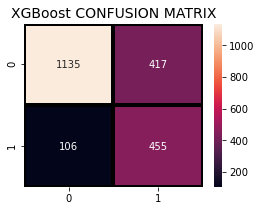

오차 행렬
[[1135  417]
 [ 106  455]]
정확도: 0.75, 정밀도: 0.52, 재현율: 0.81,    F1: 0.64,  AUC:0.85


In [ ]:
from xgboost import XGBClassifier

xgb_model_r=XGBClassifier( learning_rate = 0.02, colsample_bytree = 0.5,min_child_weight =1)

xgb_model_r.fit(X_train_o, y_train_o, early_stopping_rounds=200,
             eval_metric='auc', eval_set=[(X_train_o,y_train_o),(X_test,y_test)])
xgb_pred_r = xgb_model_r.predict(X_test)
xgb_pred_proba_r = xgb_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, xgb_pred_r, xgb_pred_proba_r)

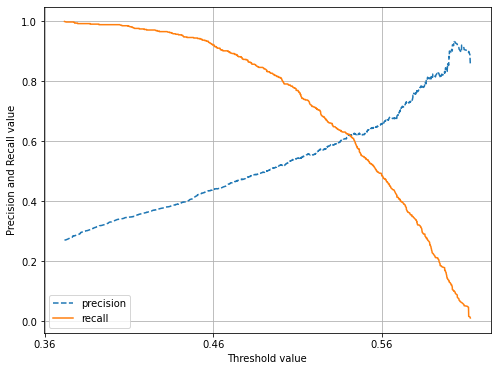

In [ ]:
precision_recall_curve_plot( y_test, xgb_pred_proba_r)

### XGBoost Feature_importance

In [ ]:
from xgboost import plot_importance
%matplotlib inline

fit,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model_r,ax=ax)

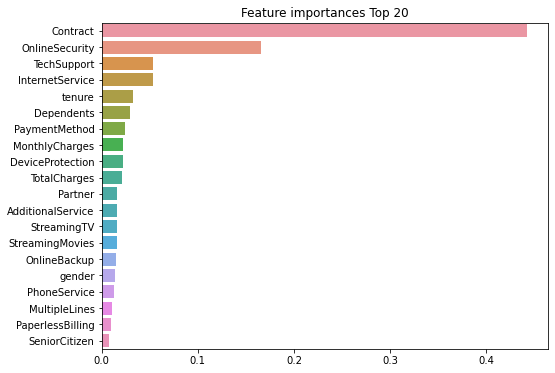

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# 앞으로 계속 중요도 시각화를 죽 계속할 건데 이 코드를 계속 비슷하게 사용한다고 생각하면 됨
ftr_importances_values = xgb_model_r.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## LGBM

[1]	valid_0's auc: 0.824421	valid_0's binary_logloss: 0.660104
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.825456	valid_0's binary_logloss: 0.633507
[3]	valid_0's auc: 0.826098	valid_0's binary_logloss: 0.612144
[4]	valid_0's auc: 0.830861	valid_0's binary_logloss: 0.594685
[5]	valid_0's auc: 0.832322	valid_0's binary_logloss: 0.579215
[6]	valid_0's auc: 0.835982	valid_0's binary_logloss: 0.565548
[7]	valid_0's auc: 0.837245	valid_0's binary_logloss: 0.554405
[8]	valid_0's auc: 0.839105	valid_0's binary_logloss: 0.544474
[9]	valid_0's auc: 0.840533	valid_0's binary_logloss: 0.535935
[10]	valid_0's auc: 0.84172	valid_0's binary_logloss: 0.5293
[11]	valid_0's auc: 0.840975	valid_0's binary_logloss: 0.523476
[12]	valid_0's auc: 0.841706	valid_0's binary_logloss: 0.517772
[13]	valid_0's auc: 0.841472	valid_0's binary_logloss: 0.513396
[14]	valid_0's auc: 0.841908	valid_0's binary_logloss: 0.508803
[15]	valid_0's auc: 0.841526	valid_0's binary_logloss:

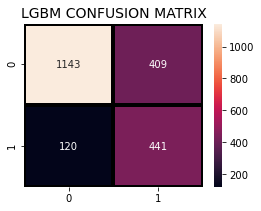

오차 행렬
[[1143  409]
 [ 120  441]]
정확도: 0.75, 정밀도: 0.52, 재현율: 0.79,    F1: 0.63,  AUC:0.84


In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

lgbm_model = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
#eval_metric = 평가
lgbm_model.fit(X_train_o, y_train_o, early_stopping_rounds=200,
                 eval_metric='auc', eval_set=evals, verbose=True)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:,1]

# Confusion_Maxtrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lgbm_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LGBM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

In [ ]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200, learning_rate=0.02)

params = {'num_leaves': [2,4,8,16,20],
          'max_depth':[2,4,6,8,10,12,14,16],
          'min_child_samples':[20,40,60, 100],
          'subsample':[0.8, 1,1.2]}


lgbm_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=5)
lgbm_cv.fit(X_train_o, y_train_o, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', lgbm_cv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, lgbm_cv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.2f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.680434	valid_0's binary_logloss: 0.680625
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.76547	valid_0's binary_logloss: 0.662981
[3]	valid_0's auc: 0.76547	valid_0's binary_logloss: 0.64876
[4]	valid_0's auc: 0.7962	valid_0's binary_logloss: 0.638095
[5]	valid_0's auc: 0.805855	valid_0's binary_logloss: 0.629393
[6]	valid_0's auc: 0.815752	valid_0's binary_logloss: 0.620016
[7]	valid_0's auc: 0.815626	valid_0's binary_logloss: 0.612447
[8]	valid_0's auc: 0.817021	valid_0's binary_logloss: 0.60393
[9]	valid_0's auc: 0.816076	valid_0's binary_logloss: 0.596962
[10]	valid_0's auc: 0.812865	valid_0's binary_logloss: 0.591779
[11]	valid_0's auc: 0.812857	valid_0's binary_logloss: 0.586569
[12]	valid_0's auc: 0.827314	valid_0's binary_logloss: 0.582718
[13]	valid_0's auc: 0.82819	valid_0's binary_logloss: 0.578368
[14]	valid_0's auc: 0.826038	valid_0's binary_logloss: 0.574242
[15]	valid_0's auc: 0.826652	valid_0's binary_logloss: 0.5

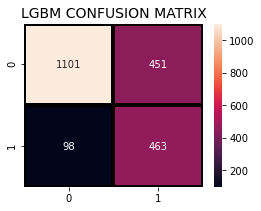

오차 행렬
[[1101  451]
 [  98  463]]
정확도: 0.74, 정밀도: 0.51, 재현율: 0.83,    F1: 0.63,  AUC:0.85


In [ ]:
lgbm_model_r = LGBMClassifier(num_leaves = 2,colsample_bytree = 0.5,min_child_weight =1)

evals = [(X_test, y_test)]
#eval_metric = 평가
lgbm_model_r.fit(X_train_o, y_train_o, early_stopping_rounds=300,
                 eval_metric='auc', eval_set=evals, verbose=1)
lgbm_pred_r = lgbm_model_r.predict(X_test)
lgbm_pred_proba_r = lgbm_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lgbm_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LGBM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lgbm_pred_r,lgbm_pred_proba_r)

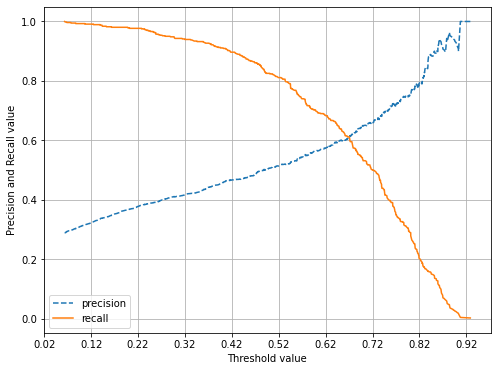

In [ ]:
precision_recall_curve_plot( y_test, lgbm_pred_proba_r)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

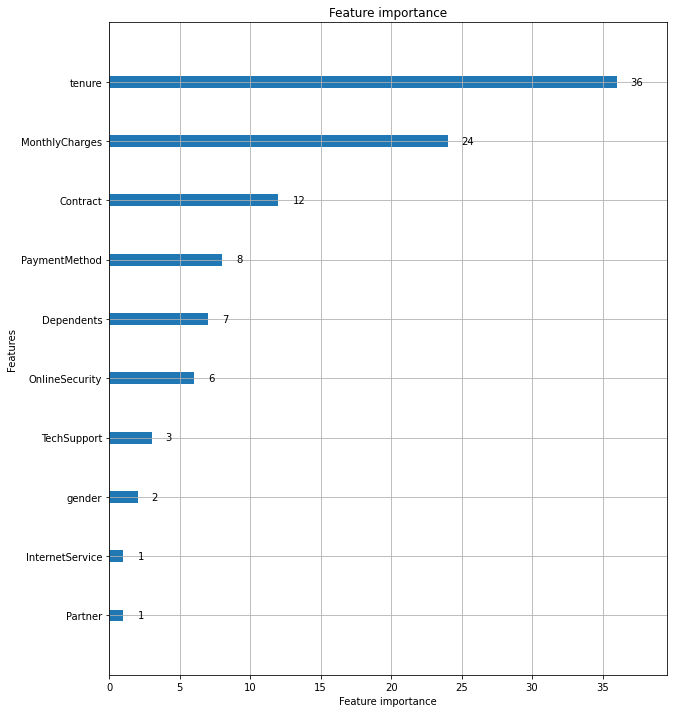

In [ ]:
from lightgbm import plot_importance
%matplotlib inline

fit,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_model_r,ax=ax)

## RandomForest

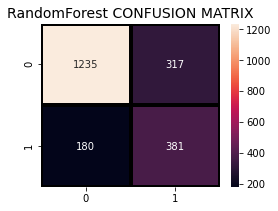

오차 행렬
[[1235  317]
 [ 180  381]]
정확도: 0.76, 정밀도: 0.55, 재현율: 0.68,    F1: 0.61,  AUC:0.82


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_o,y_train_o)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForest CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,rf_pred,rf_pred_proba)

### RandomForest Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [2,4,6,8,10],
    'min_samples_leaf' : [2,4, 6, 8],
    'min_samples_split' : [2,4,8,12,16]}

rf_cv = GridSearchCV(rf_model, param_grid=params, scoring='recall', cv=5, n_jobs=-1)
rf_cv.fit(X_train_o , y_train_o)
rf_pred_cv = rf_model.predict(X_test)

print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(rf_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', rf_cv.best_params_)

GridSearchCV 최고 재현율 수치:0.85
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


### RandomForest 모델개선

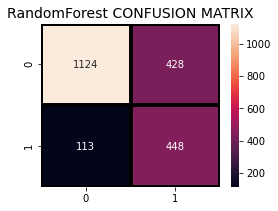

오차 행렬
[[1124  428]
 [ 113  448]]
정확도: 0.74, 정밀도: 0.51, 재현율: 0.80,    F1: 0.62,  AUC:0.84


In [ ]:
rf_model_r = RandomForestClassifier(n_estimators=100,random_state=156,  max_depth=4, min_samples_leaf=2, min_samples_split=2)
rf_model_r.fit(X_train_o,y_train_o)
rf_pred_r = rf_model_r.predict(X_test)
rf_pred_proba_r = rf_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForest CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, rf_pred_r, rf_pred_proba_r)

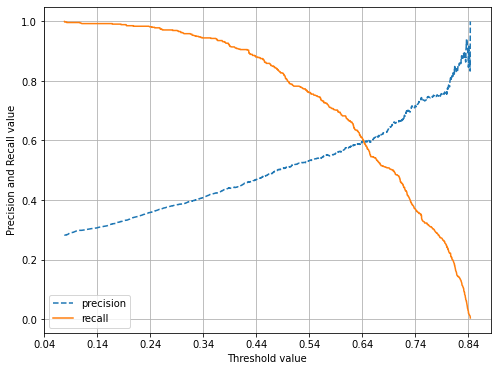

In [ ]:
precision_recall_curve_plot( y_test, rf_pred_proba_r)

In [ ]:
### RandomForest Feature_Importances

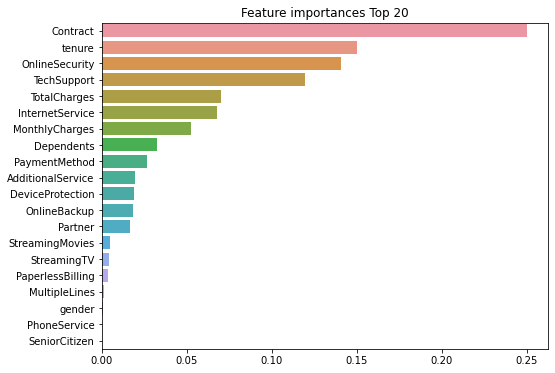

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# 앞으로 계속 중요도 시각화를 죽 계속할 건데 이 코드를 계속 비슷하게 사용한다고 생각하면 됨
ftr_importances_values = rf_model_r.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## LogisticRegression

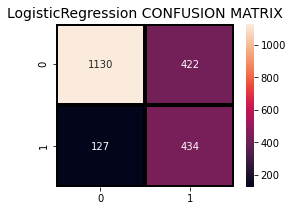

오차 행렬
[[1130  422]
 [ 127  434]]
정확도: 0.74, 정밀도: 0.51, 재현율: 0.77,    F1: 0.61,  AUC:0.84


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_o,y_train_o)
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LogisticRegression CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lr_pred,lr_pred_proba)

### LogisticRegression - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ['l2','l1'],
          'C':[0.01, 0.1, 1, 1, 3, 5, 10, 15, 20]}
lr_cv = GridSearchCV(lr_model, param_grid=params, scoring='recall', cv=5)
lr_cv.fit(X_train_o,y_train_o)
lr_pred_cv = lr_model.predict(X_test)
print('최적 하이퍼 파라미터:{0}, \n최적 재현율:{1:.3f}'.format(lr_cv.best_params_,lr_cv.best_score_))

### LogsticRegression 모델개선

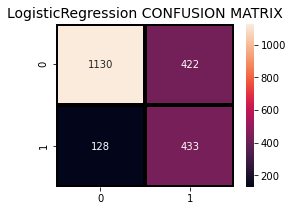

오차 행렬
[[1130  422]
 [ 127  434]]
정확도: 0.74, 정밀도: 0.51, 재현율: 0.77,    F1: 0.61,  AUC:0.84


In [ ]:
lr_model_r = LogisticRegression(C=3, penalty='l2')
lr_model_r.fit(X_train_o,y_train_o)
lr_pred_r = lr_model_r.predict(X_test)
lr_pred_proba_r = lr_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LogisticRegression CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lr_pred,lr_pred_proba)

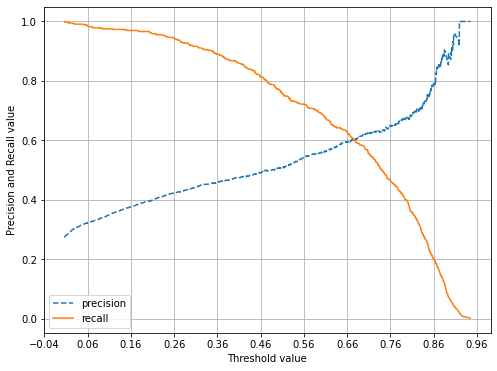

In [ ]:
precision_recall_curve_plot( y_test, lr_pred_proba_r)

## 나이브베이즈(BernoulliNB)

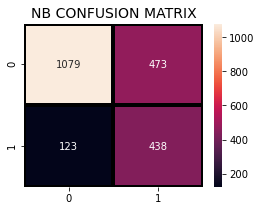

오차 행렬
[[1079  473]
 [ 123  438]]
정확도: 0.72, 정밀도: 0.48, 재현율: 0.78,    F1: 0.60,  AUC:0.81


In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()
nb_model.fit(X_train_o,y_train_o)
nb_pred = nb_model.predict(X_test)
nb_pred_proba = nb_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, nb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("NB CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,nb_pred,nb_pred_proba)

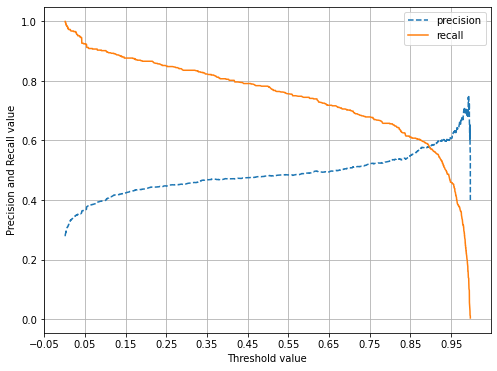

In [ ]:
precision_recall_curve_plot( y_test, nb_pred_proba)

## SVM

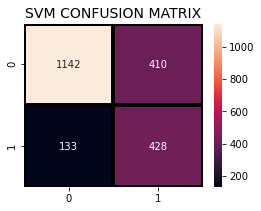

오차행렬:
 [[1142  410]
 [ 133  428]]
정확도 : 0.74, 정밀도 : 0.51, 재현율 : 0.76, f1_score:0.61


In [ ]:
from sklearn.svm import SVC  

svm_model = SVC().fit(X_train_o, y_train_o)
svm_pred = svm_model.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svm_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_val(y_test,svm_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'C':[0.1,1],
          'kernel':['rbf','poly','sigmoid','linear'],
          'degree':[1,2],'gamma': [0.001, 0.0001]}
svm_cv = GridSearchCV(svm_model,param_grid=params, scoring='recall', cv=5, verbose=1,n_jobs=-1)
svm_cv.fit(X_train_o,y_train_o)
svm_pred_r = svm_model.predict(X_test)

print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(svm_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', svm_cv.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   28.1s finished


GridSearchCV 최고 재현율 수치:0.96
GridSearchCV 최적 하이퍼 파라미터: {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}


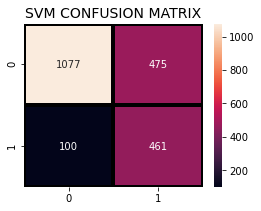

오차행렬:
 [[1077  475]
 [ 100  461]]
정확도 : 0.73, 정밀도 : 0.49, 재현율 : 0.82, f1_score:0.62


In [ ]:
from sklearn.svm import SVC  

svm_model_r = SVC(kernel='rbf',gamma=0.001, degree=2, C=1).fit(X_train_o, y_train_o)
svm_pred_r = svm_model_r.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svm_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_val(y_test,svm_pred_r)

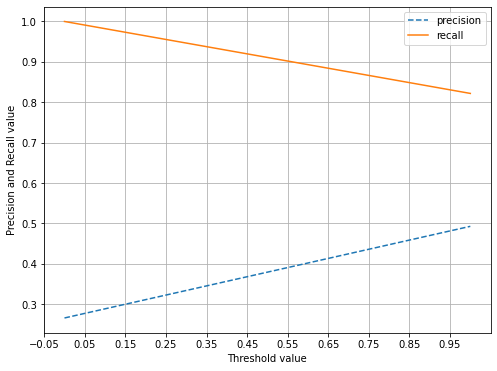

In [ ]:
precision_recall_curve_plot( y_test, svm_pred_r)